# Imports for data assembly

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage import data
from skimage import draw


import glob
import os
from scipy import misc
import math

import gc

import timeit
import imageio
import tensorflow

## Define data labels
Each folder in the data path will be a different label for classification

In [2]:
IMG_SIZE = 60

In [3]:
# This convers the numeric label to a one-hot encoded label
# example:
# label 3 of 4 classes becomes [0, 0, 1, 0]
# These correspond to the desired activations of the final layer neurons.

def encode_one_hot(label, n_labels):
    one_hot = np.zeros(n_labels)
    one_hot[label] = 1
    return one_hot

# deal with color and bw images
def imshow(img):
    h,w,d = np.shape(img)
    if d==3:
        plt.imshow(img)
    if d==1:
        plt.imshow(img[:,:,0], cmap='gray', vmin=0, vmax=1.0)

# Cener crop images to maximum size
def square_image(img):
    min_dim = np.min(img.shape[:2])
    y, x = img.shape[:2]
    startx = x//2-(min_dim//2)
    starty = y//2-(min_dim//2)    
    return img[starty:starty+min_dim,startx:startx+min_dim]

# Saving a BW image
def save_bw_img(img, path, file_name):
    file_path = "{}/{}.png".format(path, file_name)
    plt.imsave(arr=np.dstack([img[:,:,0], img[:,:,0], img[:,:,0]]), fname=file_path)

# Example usage
# save_bw_img(img, 'data', 'test0')

# Generate training data

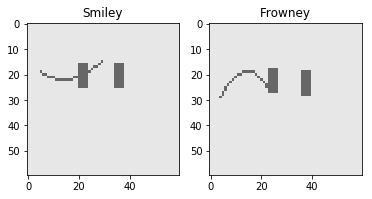

Tensor of shape: (2000, 60, 60, 1)


In [4]:
def generate_color_data(n, size):
    X = []
    y = []
    boarder = size//4
    for i in range(n):
        img = np.zeros([size,size,3])
        img[:,:,:] = np.random.uniform(0,1,3)
        img[boarder:-boarder,boarder:-boarder] = [1.,0,0]
        X.append(img)
        y.append(encode_one_hot(0, 2))
        
        img = np.zeros([size,size,3])
        img[:,:,:] = np.random.uniform(0,1.,3)
        img[boarder:-boarder,boarder:-boarder] = [0,1.,0]
        X.append(img)
        y.append(encode_one_hot(1, 2))
        
    readable_labels = {0: 'Red', 1: 'Green'}
    return np.array(X), np.array(y), readable_labels

def generate_bw_data(n, size, save=True):
    X = []
    y = []
    boarder = size//4
    for i in range(n):
        faceColor = np.random.uniform(0., 1.)
        backgroundColor = (faceColor + 0.5) % 1
        #Smiley----------------------------------------------------------------------
        
        #Make background white
        img = np.zeros([size, size,1])
        img[:,:] = backgroundColor
        
        randBoarder = 1.9
        
        #Make right eye
        randX = np.random.uniform(-5, -10)
        randY = np.random.uniform(4, 8)
        img[int(boarder*randBoarder + randX) - 3:int(-boarder*randBoarder + randX) + 3,int(boarder*randBoarder + randY):int(-boarder*randBoarder + randY)] = faceColor
        
        #Make left eye
        randX = np.random.uniform(-5, -10)
        randY = np.random.uniform(-4, -8)
        img[int(boarder*randBoarder + randX) - 3:int(-boarder*randBoarder + randX) + 3,int(boarder*randBoarder + randY):int(-boarder*randBoarder + randY)] = faceColor
        
        #Make smile
        startX = np.random.uniform(10, 20)
        startY = np.random.uniform(3, 7)
        curveX = np.random.uniform(26, 31)
        curveY = np.random.uniform(13, 17)
        endX = np.random.uniform(10, 20)
        endY = np.random.uniform(20, 30)
        curvature = np.random.uniform(1, 2)
    
        rr, cc = draw.bezier_curve(int(startX), int(startY), int(curveX), int(curveY), int(endX), int(endY), int(curvature))
        img[rr, cc] = faceColor
        
        
        if save:
            save_bw_img(img, 'data/SmileyImages', i)
        X.append(img)
        y.append(encode_one_hot(0, 2))
        
        #Frowney-----------------------------------------------------------------------
        
        #Make background white
        img = np.zeros([size, size,1])
        img[:,:] = backgroundColor
        
        randBoarder = 1.9

        #Make right eye
        randX = np.random.uniform(-5, -10)
        randY = np.random.uniform(4, 8)
        img[int(boarder*randBoarder + randX) - 3:int(-boarder*randBoarder + randX) + 3,int(boarder*randBoarder + randY):int(-boarder*randBoarder + randY)] = faceColor
        
        #Make left eye
        randX = np.random.uniform(-5, -10)
        randY = np.random.uniform(-4, -8)
        img[int(boarder*randBoarder + randX) - 3:int(-boarder*randBoarder + randX) + 3,int(boarder*randBoarder + randY):int(-boarder*randBoarder + randY)] = faceColor
        
        #Make frown
        startX = np.random.uniform(24, 30)
        startY = np.random.uniform(3, 7)
        curveX = np.random.uniform(10, 20)
        curveY = np.random.uniform(13, 17)
        endX = np.random.uniform(24, 30)
        endY = np.random.uniform(20, 30)
        curvature = np.random.uniform(1, 2)
        
        rr, cc = draw.bezier_curve(int(startX), int(startY), int(curveX), int(curveY), int(endX), int(endY), int(curvature))
        img[rr, cc] = faceColor
        
        if save:
            save_bw_img(img, 'data/FrowneyImages', i)
        X.append(img)
        y.append(encode_one_hot(1, 2))
    readable_labels = {0: 'Smiley', 1: 'Frowney', 2: 'Neutral', 3: 'SortaSmiley', 4: 'SortaFrowney'}
    return np.array(X), np.array(y), readable_labels


# Generate color data
# X_all, y_all, readable_labels = generate_color_data(1000, IMG_SIZE)

# Generate black and white data
X_all, y_all, readable_labels = generate_bw_data(1000, IMG_SIZE, save=False)

# Number of classes
n_classes = len(readable_labels)

# Show examples
plt.subplots()
plt.subplot(1,2,1)
imshow(X_all[0])
plt.title(readable_labels[np.argmax(y_all[0])])

plt.subplot(1,2,2)
imshow(X_all[1])
plt.title(readable_labels[np.argmax(y_all[1])])
plt.show()

print("Tensor of shape: {}".format(np.shape(X_all)))

# Import training data

In [42]:
# The folders within the data_folder should contain the images sorted by folder
# All images in each of the folder are assigned their folder name as their label
def import_from_folders(data_folder='FaceData1/', bw=True, size=60):
    X_all = []
    y_all = []
    hash_set = set()
    
    readable_labels = {}
    for i, path in enumerate(glob.glob(data_folder+'*')):
        label = os.path.basename(path)
        readable_labels[i] = label
        print("Label {}: {}".format(i, label))

    n_classes = len(readable_labels)
    
    for i, path in enumerate(glob.glob(data_folder+'*')):
        for infile in glob.glob(path+"/*"):
            print(infile)
            if bw:
                img = misc.imread(infile, flatten=False, mode='L')
                img = square_image(img)
                img = misc.imresize(img, (size, size), interp='cubic')
                img = img.reshape(IMG_SIZE, IMG_SIZE, 1)
                img = img/255
            else:
                img = misc.imread(infile, flatten=False, mode='RGB')
                img = square_image(img)
                img = misc.imresize(img, (size, size), interp='cubic')
                img = img/255
            
            img_hash = hash(img.data.tobytes())
            if img_hash not in hash_set:
                #hash_set.add(img_hash)
                
                X_all.append(img)
                y_all.append(encode_one_hot(i, n_classes))

    X_all = np.array(X_all)
    y_all = np.array(y_all)
    print("{} images loaded with {} classes.".format(len(X_all), n_classes))
    return X_all, y_all, readable_labels

X_all, y_all, readable_labels = import_from_folders('faceData1/', True, IMG_SIZE)
n_classes = len(readable_labels)

Label 0: female
Label 1: male
faceData1\female\Aaron_Mink_9_oval.png
faceData1\female\Adam_Cauthen_11_oval.png
faceData1\female\Adam_Cowart_5_oval.png
faceData1\female\Ada_Galbreath_19_oval.png
faceData1\female\Adrienne_Blaney_1_oval.png
faceData1\female\Adrienne_Coen_13_oval.png
faceData1\female\Alan_Gamerson_7_oval.png
faceData1\female\Alberta_Akins_7_oval.png
faceData1\female\Albert_Carbaugh_3_oval.png
faceData1\female\Albert_Cardoza_5_oval.png
faceData1\female\Albert_Carlyle_5_oval.png
faceData1\female\Albert_Dobson_9_oval.png
faceData1\female\Albert_Neu_7_oval.png
faceData1\female\Alice_Mckellar_11_oval.png
faceData1\female\Alison_Trejo_7_oval.png
faceData1\female\Allen_Council_15_oval.png
faceData1\female\Allen_Eagan_9_oval.png
faceData1\female\Allison_Baldridge_1_oval.png
faceData1\female\Allison_Hargrave_13_oval.png
faceData1\female\Allison_Samson_13_oval.png
faceData1\female\Allison_Stubbs_15_oval.png
faceData1\female\Allison_Zambrano_9_oval.png
faceData1\female\Alma_Melanson_

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


faceData1\female\Google_1_Darlene Bourque_9_oval.png
faceData1\female\Google_1_Darlene Lefler_4_oval.png
faceData1\female\Google_1_Darlene Perrone_11_oval.png
faceData1\female\Google_1_Darlene Perrone_13_oval.png
faceData1\female\Google_1_Dawn Sampson_5_oval.png
faceData1\female\Google_1_Dawn Smtih_13_oval.png
faceData1\female\Google_1_Debbie Blackwell_11_oval.png
faceData1\female\Google_1_Debbie Blackwell_15_oval.png
faceData1\female\Google_1_Debbie Dufrene_5_oval.png
faceData1\female\Google_1_Debbie Ginsberg_7_oval.png
faceData1\female\Google_1_Debbie Ma_9_oval.png
faceData1\female\Google_1_Deborah Mathison_19_oval.png
faceData1\female\Google_1_Debra Frierson_5_oval.png
faceData1\female\Google_1_Debra Jankowski_7_oval.png
faceData1\female\Google_1_Della Settles_1_oval.png
faceData1\female\Google_1_Delores Creed_19_oval.png
faceData1\female\Google_1_Delores Friel_1_oval.png
faceData1\female\Google_1_Denise Bach_11_oval.png
faceData1\female\Google_1_Denise Bach_7_oval.png
faceData1\fem

faceData1\female\Google_1_Joann Masse_5_oval.png
faceData1\female\Google_1_Joanna Saito_3_oval.png
faceData1\female\Google_1_Joanna Silvas_3_oval.png
faceData1\female\Google_1_Joanna Solano_9_oval.png
faceData1\female\Google_1_Jodi Comer_5_oval.png
faceData1\female\Google_1_Jodi Morrow_19_oval.png
faceData1\female\Google_1_Joe Claxton_9_oval.png
faceData1\female\Google_1_Joe Crook_3_oval.png
faceData1\female\Google_1_Joe Fannin_11_oval.png
faceData1\female\Google_1_Joe Muniz_15_oval.png
faceData1\female\Google_1_John Baumgartner_7_oval.png
faceData1\female\Google_1_John Ingraham_5_oval.png
faceData1\female\Google_1_John Stiltner_3_oval.png
faceData1\female\Google_1_Jonathan Bushnell_5_oval.png
faceData1\female\Google_1_Jonathan Marek_13_oval.png
faceData1\female\Google_1_Jonathan Menendez_5_oval.png
faceData1\female\Google_1_Jonathan Wille_10_oval.png
faceData1\female\Google_1_Jonathan Wille_12_oval.png
faceData1\female\Google_1_Jose Braddy_1_oval.png
faceData1\female\Google_1_Jose Mcb

faceData1\female\Google_1_Olga Ruch_1_oval.png
faceData1\female\Google_1_Olivia Browning_7_oval.png
faceData1\female\Google_1_Pam Irvin_1_oval.png
faceData1\female\Google_1_Pamela Bermudez_3_oval.png
faceData1\female\Google_1_Pamela Griffith_1_oval.png
faceData1\female\Google_1_Pamela Metzler_9_oval.png
faceData1\female\Google_1_Pamela Salvatore_3_oval.png
faceData1\female\Google_1_Patrick Clyburn_16_oval.png
faceData1\female\Google_1_Patrick Dionne_18_oval.png
faceData1\female\Google_1_Patrick Guertin_9_oval.png
faceData1\female\Google_1_Patrick Mast_7_oval.png
faceData1\female\Google_1_Patrick Woolley_9_oval.png
faceData1\female\Google_1_Patsy Vice_5_oval.png
faceData1\female\Google_1_Patty Corwin_1_oval.png
faceData1\female\Google_1_Paul Horst_15_oval.png
faceData1\female\Google_1_Paul Howse_5_oval.png
faceData1\female\Google_1_Paul Whitson_9_oval.png
faceData1\female\Google_1_Paula Gorham_11_oval.png
faceData1\female\Google_1_Paula Keeler_1_oval.png
faceData1\female\Google_1_Paulin

faceData1\female\Google_1_Victor Dasher_5_oval.png
faceData1\female\Google_1_Victor Ellinger_16_oval.png
faceData1\female\Google_1_Victor Fleenor_7_oval.png
faceData1\female\Google_1_Victor Mcdevitt_11_oval.png
faceData1\female\Google_1_Victor Mosby_13_oval.png
faceData1\female\Google_1_Victor Polson_7_oval.png
faceData1\female\Google_1_Victor Thibodeaux_15_oval.png
faceData1\female\Google_1_Victoria Ambrose_17_oval.png
faceData1\female\Google_1_Victoria Pettiford_19_oval.png
faceData1\female\Google_1_Victoria Strawser_3_oval.png
faceData1\female\Google_1_Vincent Eades_5_oval.png
faceData1\female\Google_1_Vincent Guest_7_oval.png
faceData1\female\Google_1_Vincent Halstead_13_oval.png
faceData1\female\Google_1_Vincent Sappington_17_oval.png
faceData1\female\Google_1_Virginia Christy_9_oval.png
faceData1\female\Google_1_Virginia Madore_3_oval.png
faceData1\female\Google_1_Virginia Stokes_5_oval.png
faceData1\female\Google_1_Vivian Keenan_7_oval.png
faceData1\female\Google_1_Vivian Tucker

faceData1\male\Google_1_Barbara Zimmerman_2_oval.png
faceData1\male\Google_1_Beatrice Melancon_7_oval.png
faceData1\male\Google_1_Becky Nevels_9_oval.png
faceData1\male\Google_1_Becky Richmond_3_oval.png
faceData1\male\Google_1_Belinda Dupuis_9_oval.png
faceData1\male\Google_1_Belinda Penner_7_oval.png
faceData1\male\Google_1_Belinda Steib_3_oval.png
faceData1\male\Google_1_Benjamin Barber_9_oval.png
faceData1\male\Google_1_Benjamin Gilstrap_3_oval.png
faceData1\male\Google_1_Benjamin Keck_17_oval.png
faceData1\male\Google_1_Benjamin Mcshane_15_oval.png
faceData1\male\Google_1_Benjamin Quintana_19_oval.png
faceData1\male\Google_1_Bernice Branton_7_oval.png
faceData1\male\Google_1_Bessie Wolfe_19_oval.png
faceData1\male\Google_1_Betty Fritz_7_oval.png
faceData1\male\Google_1_Beulah Clouse_5_oval.png
faceData1\male\Google_1_Billy Kiely_1_oval.png
faceData1\male\Google_1_Billy Lheureux_3_oval.png
faceData1\male\Google_1_Billy Spangler_7_oval.png
faceData1\male\Google_1_Blanca Jorgensen_17

faceData1\male\Google_1_Eric Hawley_7_oval.png
faceData1\male\Google_1_Eric Lashley_6_oval.png
faceData1\male\Google_1_Eric Mcalpine_13_oval.png
faceData1\male\Google_1_Eric Osuna_3_oval.png
faceData1\male\Google_1_Eric Strickland_9_oval.png
faceData1\male\Google_1_Erica Baber_15_oval.png
faceData1\male\Google_1_Erica Vue_9_oval.png
faceData1\male\Google_1_Erika Severson_17_oval.png
faceData1\male\Google_1_Erika Wyche_1_oval.png
faceData1\male\Google_1_Erma Jay_3_oval.png
faceData1\male\Google_1_Ernest Ashburn_13_oval.png
faceData1\male\Google_1_Ernest Melvin_3_oval.png
faceData1\male\Google_1_Ernest Snyder_13_oval.png
faceData1\male\Google_1_Ernest Swisher_9_oval.png
faceData1\male\Google_1_Eugene Mars_3_oval.png
faceData1\male\Google_1_Eugene Mccue_17_oval.png
faceData1\male\Google_1_Eunice Johnston_7_oval.png
faceData1\male\Google_1_Fannie Trader_5_oval.png
faceData1\male\Google_1_Flora Newsome_15_oval.png
faceData1\male\Google_1_Frank Beckner_3_oval.png
faceData1\male\Google_1_Fran

faceData1\male\Google_1_John Thomas_15_oval.png
faceData1\male\Google_1_John Woolf_11_oval.png
faceData1\male\Google_1_John Zuniga_7_oval.png
faceData1\male\Google_1_Johnny Arenas_9_oval.png
faceData1\male\Google_1_Johnny Block_1_oval.png
faceData1\male\Google_1_Johnny Lin_3_oval.png
faceData1\male\Google_1_Johnny Nowicki_11_oval.png
faceData1\male\Google_1_Jonathan Agnew_17_oval.png
faceData1\male\Google_1_Jonathan Bogle_9_oval.png
faceData1\male\Google_1_Jonathan Bozarth_17_oval.png
faceData1\male\Google_1_Jonathan Crosby_11_oval.png
faceData1\male\Google_1_Jonathan Marek_5_oval.png
faceData1\male\Google_1_Jonathan Mcgruder_5_oval.png
faceData1\male\Google_1_Jonathan Mcgruder_7_oval.png
faceData1\male\Google_1_Jonathan Merchant_11_oval.png
faceData1\male\Google_1_Jonathan Merchant_13_oval.png
faceData1\male\Google_1_Jose Bustamante_15_oval.png
faceData1\male\Google_1_Jose Dvorak_7_oval.png
faceData1\male\Google_1_Jose Monaghan_9_oval.png
faceData1\male\Google_1_Jose Soto_1_oval.png
f

faceData1\male\Google_1_Mike Gass_3_oval.png
faceData1\male\Google_1_Mike Graff_5-oval.png
faceData1\male\Google_1_Mike Hahn_17_oval.png
faceData1\male\Google_1_Mike Hildebrand_9_oval.png
faceData1\male\Google_1_Mike Holton_15_oval.png
faceData1\male\Google_1_Mike Negron_7_oval.png
faceData1\male\Google_1_Mike Spruill_3_oval.png
faceData1\male\Google_1_Mike Tye_7_oval.png
faceData1\male\Google_1_Molly Mccants_15_oval.png
faceData1\male\Google_1_Monique Hairston_15_oval.png
faceData1\male\Google_1_Myrtle Fowler_15_oval.png
faceData1\male\Google_1_Nancy Goebel_13_oval.png
faceData1\male\Google_1_Natalie Harriman_9_oval.png
faceData1\male\Google_1_Natalie Maes_7_oval.png
faceData1\male\Google_1_Natalie Whyte_1_oval.png
faceData1\male\Google_1_Nathan Beauregard_3_oval.png
faceData1\male\Google_1_Nathan Kiger_3_oval.png
faceData1\male\Google_1_Nathan Kiger_7_oval (2).png
faceData1\male\Google_1_Nathan Lusk_17_oval.png
faceData1\male\Google_1_Nathan Teel_19_oval.png
faceData1\male\Google_1_N

faceData1\male\Google_1_Sarah Stricklin_13_oval.png
faceData1\male\Google_1_Scott Bent_5_oval.png
faceData1\male\Google_1_Scott Bevins_1_oval.png
faceData1\male\Google_1_Scott Bouchard_9_oval.png
faceData1\male\Google_1_Scott Ernst_19_oval.png
faceData1\male\Google_1_Scott Gupta_9_oval.png
faceData1\male\Google_1_Scott Irons_5_oval.png
faceData1\male\Google_1_Scott Westcott_13_oval.png
faceData1\male\Google_1_Scott Whelan_1_oval.png
faceData1\male\Google_1_Scott Willis_15_oval.png
faceData1\male\Google_1_Sean Ard_1_oval.png
faceData1\male\Google_1_Sean Bissonnette_1_oval.png
faceData1\male\Google_1_Sean Elder_15_oval.png
faceData1\male\Google_1_Sean Friesen_16_oval.png
faceData1\male\Google_1_Sean Ham_7_oval.png
faceData1\male\Google_1_Sean Hazel_1_oval.png
faceData1\male\Google_1_Sean Heintz_1_oval.png
faceData1\male\Google_1_Sean Holcomb_1_oval.png
faceData1\male\Google_1_Sean Lane_3_oval.png
faceData1\male\Google_1_Sean Raleigh_7_oval.png
faceData1\male\Google_1_Sean Revels_7_oval.p

faceData1\male\Kelli_Hetrick_11_oval.png
2221 images loaded with 2 classes.


# Review Data

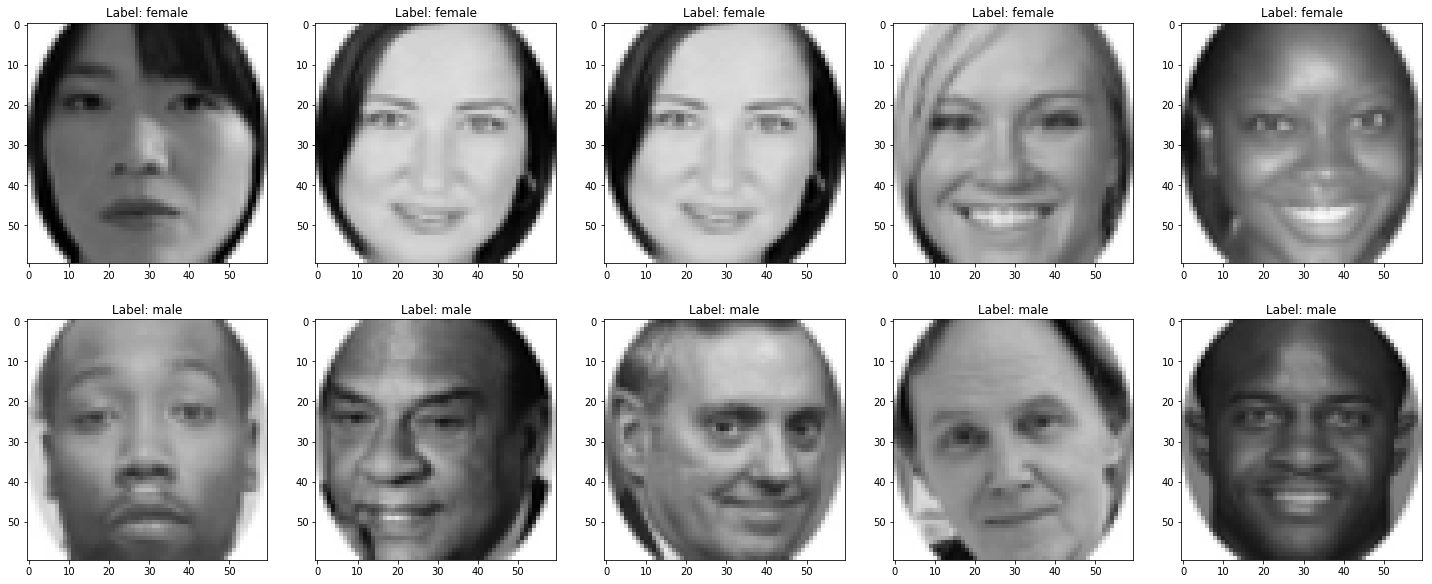

In [6]:
n_examples = 5
plt.subplots(figsize=(5*n_examples, 5*n_classes))
plt_index = 1
for i in range(len(y_all[0])):
    X_i = X_all[y_all[:,i] == 1]
    for img_index in np.random.randint(0, len(X_i), n_examples):
        plt.subplot(n_classes, n_examples, plt_index)
        imshow(X_i[img_index])
        plt.title("Label: {}".format(readable_labels[i]))
        plt_index += 1
plt.show()    

# Split data into Train and Test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.10, random_state=121)
print("Train Size: {}".format(len(y_train)))
print("Test Size: {}".format(len(y_test)))
print(X_all[0].shape)

Train Size: 1997
Test Size: 222
(60, 60, 1)


# Look at the distribution of data
If there is bias in the distribution this same bias will be present in the classifier

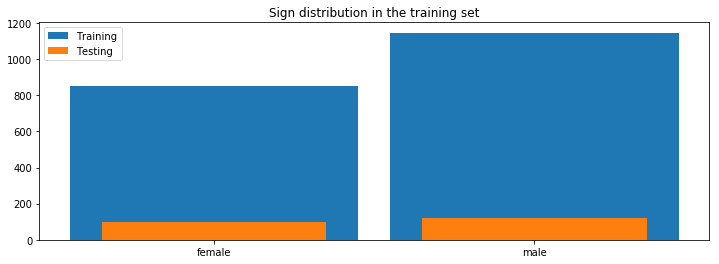

In [8]:
# Look at the distribution of training signs
fig = plt.figure()
fig.set_size_inches(12, 4)
ax = plt.subplot(111)
ax.hist(np.argmax(y_train, axis=1), bins=np.arange(n_classes+1), rwidth=0.9, label="Training")
ax.hist(np.argmax(y_test, axis=1), bins=np.arange(n_classes+1), rwidth=0.7, label='Testing')
ax.set_xticks(np.arange(n_classes)+0.5)
ax.set_xticklabels(readable_labels.values(), rotation=0)
plt.title("Sign distribution in the training set")
plt.legend()
plt.show()

In [9]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

C:\Users\julia\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Construct the network

In [10]:
# Define network

def CNN(n_classes):
    model = Sequential()

    # Conv layer 1
    # 3x3 convolution with 32 filters
    model.add(Conv2D(16, (3, 3),
                     strides=1,
                     padding='same',
                     input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    
    # Pool layer 1
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    # Conv layer 2
    # 3x3 convolution with 24 filters
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))

    # Pool layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
#     # Conv layer 3
#     # 3x3 convolution with 16 filters
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    
#     # Pool layer 3
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
               
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
               
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    # FC layers
    model.add(Flatten())
    # Dense layer with 24 nodes
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    
    # Final dense layer with 1 node per class
    model.add(Dense(n_classes))

    model.add(Activation('softmax'))
    return model

# Train!

In [11]:
batch_size = 128 # batch size can not be larger than the number of samples
epochs = 8192
data_augmentation = True
early_stop = False
patience = 0

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'trained_model.h5'

# The data, shuffled and split between train and test sets:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print("Batch size: {}".format(batch_size))
print("Epochs: {}".format(epochs))
if early_stop:
    print("Early Stopping enabled with patience of {}".format(patience))

# Assign model
model = CNN(n_classes)

# initiate Adam optimizer
# opt = keras.optimizers.Adam(lr=0.000001, decay=1e-6)
opt = keras.optimizers.Adam()

# Compile traininer with loss and optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    
    # Setup early stopping on validation loss
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
    
    # Fit
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True,
              callbacks=[early_stopping])

else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    if early_stop:
        # Setup early stopping on validation loss
        early_stopping = EarlyStopping(monitor='val_loss', patience=2)

        # Fit the model on the batches generated by datagen.flow().
        model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=X_train.shape[0] // batch_size,
                            epochs=epochs,
                            validation_data=(X_test, y_test),
                            workers=4,
                            callbacks=[early_stopping])
    else:
        # Fit the model on the batches generated by datagen.flow().
        model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=X_train.shape[0] // batch_size,
                            epochs=epochs,
                            validation_data=(X_test, y_test),
                            workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (1997, 60, 60, 1)
1997 train samples
222 test samples
Batch size: 128
Epochs: 8192
Using real-time data augmentation.
Epoch 1/8192
15/15 [==============================] - 6s 399ms/step - loss: 0.7063 - acc: 0.5201 - val_loss: 0.6891 - val_acc: 0.5495
Epoch 2/8192
15/15 [==============================] - 5s 310ms/step - loss: 0.6789 - acc: 0.5747 - val_loss: 0.6884 - val_acc: 0.5495
Epoch 3/8192
15/15 [==============================] - 5s 324ms/step - loss: 0.6742 - acc: 0.5835 - val_loss: 0.6853 - val_acc: 0.5495
Epoch 4/8192
15/15 [==============================] - 5s 320ms/step - loss: 0.6757 - acc: 0.5803 - val_loss: 0.6805 - val_acc: 0.5495
Epoch 5/8192
15/15 [==============================] - 4s 295ms/step - loss: 0.6623 - acc: 0.6001 - val_loss: 0.6700 - val_acc: 0.5495
Epoch 6/8192
15/15 [==============================] - 5s 334ms/step - loss: 0.6587 - acc: 0.6224 - val_loss: 0.6626 - val_acc: 0.5495
Epoch 7/8192
15/15 [==============================] - 5s 342ms/

Epoch 61/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.4981 - acc: 0.7552 - val_loss: 0.4521 - val_acc: 0.7973
Epoch 62/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.5161 - acc: 0.7519 - val_loss: 0.4487 - val_acc: 0.8063
Epoch 63/8192
15/15 [==============================] - 5s 363ms/step - loss: 0.5058 - acc: 0.7615 - val_loss: 0.4375 - val_acc: 0.8333
Epoch 64/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.5010 - acc: 0.7613 - val_loss: 0.4283 - val_acc: 0.8333
Epoch 65/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.5021 - acc: 0.7611 - val_loss: 0.4424 - val_acc: 0.8288
Epoch 66/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.4954 - acc: 0.7703 - val_loss: 0.4191 - val_acc: 0.8604
Epoch 67/8192
15/15 [==============================] - 5s 366ms/step - loss: 0.4994 - acc: 0.7531 - val_loss: 0.4212 - val_acc: 0.8514
Epoch 68/8192
15/15 [==============================] - 

15/15 [==============================] - 5s 351ms/step - loss: 0.3950 - acc: 0.8156 - val_loss: 0.2487 - val_acc: 0.9324
Epoch 122/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.3759 - acc: 0.8447 - val_loss: 0.2370 - val_acc: 0.9144
Epoch 123/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.3810 - acc: 0.8328 - val_loss: 0.2471 - val_acc: 0.9099
Epoch 124/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.3798 - acc: 0.8324 - val_loss: 0.2471 - val_acc: 0.9279
Epoch 125/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.3614 - acc: 0.8343 - val_loss: 0.2588 - val_acc: 0.9144
Epoch 126/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.3543 - acc: 0.8426 - val_loss: 0.2384 - val_acc: 0.9099
Epoch 127/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.3743 - acc: 0.8386 - val_loss: 0.2574 - val_acc: 0.9054
Epoch 128/8192
15/15 [==============================] - 5s 346m

15/15 [==============================] - 5s 355ms/step - loss: 0.3021 - acc: 0.8762 - val_loss: 0.1994 - val_acc: 0.9324
Epoch 182/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.3065 - acc: 0.8693 - val_loss: 0.1944 - val_acc: 0.9324
Epoch 183/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.3240 - acc: 0.8634 - val_loss: 0.1983 - val_acc: 0.9234
Epoch 184/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.3172 - acc: 0.8656 - val_loss: 0.2002 - val_acc: 0.9324
Epoch 185/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.3299 - acc: 0.8501 - val_loss: 0.1914 - val_acc: 0.9189
Epoch 186/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.2970 - acc: 0.8750 - val_loss: 0.2321 - val_acc: 0.9144
Epoch 187/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.3274 - acc: 0.8621 - val_loss: 0.2200 - val_acc: 0.9234
Epoch 188/8192
15/15 [==============================] - 5s 358m

15/15 [==============================] - 5s 344ms/step - loss: 0.2895 - acc: 0.8764 - val_loss: 0.1930 - val_acc: 0.9324
Epoch 242/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.2811 - acc: 0.8827 - val_loss: 0.1781 - val_acc: 0.9324
Epoch 243/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.2920 - acc: 0.8839 - val_loss: 0.1851 - val_acc: 0.9279
Epoch 244/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.2974 - acc: 0.8714 - val_loss: 0.1781 - val_acc: 0.9234
Epoch 245/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.2850 - acc: 0.8942 - val_loss: 0.1915 - val_acc: 0.9279
Epoch 246/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.2752 - acc: 0.8870 - val_loss: 0.1688 - val_acc: 0.9369
Epoch 247/8192
15/15 [==============================] - 5s 362ms/step - loss: 0.2733 - acc: 0.8861 - val_loss: 0.1903 - val_acc: 0.9144
Epoch 248/8192
15/15 [==============================] - 5s 342m

15/15 [==============================] - 5s 350ms/step - loss: 0.2507 - acc: 0.8990 - val_loss: 0.1763 - val_acc: 0.9369
Epoch 302/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.2773 - acc: 0.8809 - val_loss: 0.1806 - val_acc: 0.9369
Epoch 303/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.2813 - acc: 0.8891 - val_loss: 0.1775 - val_acc: 0.9369
Epoch 304/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.2764 - acc: 0.8876 - val_loss: 0.1647 - val_acc: 0.9324
Epoch 305/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.2788 - acc: 0.8901 - val_loss: 0.1780 - val_acc: 0.9414
Epoch 306/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.2812 - acc: 0.8848 - val_loss: 0.1745 - val_acc: 0.9459
Epoch 307/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.2729 - acc: 0.8879 - val_loss: 0.2060 - val_acc: 0.9189
Epoch 308/8192
15/15 [==============================] - 5s 348m

15/15 [==============================] - 5s 360ms/step - loss: 0.2708 - acc: 0.8896 - val_loss: 0.1689 - val_acc: 0.9279
Epoch 362/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.2545 - acc: 0.8967 - val_loss: 0.1615 - val_acc: 0.9279
Epoch 363/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.2519 - acc: 0.8946 - val_loss: 0.1825 - val_acc: 0.9459
Epoch 364/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.2643 - acc: 0.8912 - val_loss: 0.1541 - val_acc: 0.9414
Epoch 365/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.2552 - acc: 0.9008 - val_loss: 0.1505 - val_acc: 0.9414
Epoch 366/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.2649 - acc: 0.8867 - val_loss: 0.1559 - val_acc: 0.9324
Epoch 367/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.2527 - acc: 0.8895 - val_loss: 0.1553 - val_acc: 0.9595
Epoch 368/8192
15/15 [==============================] - 5s 349m

15/15 [==============================] - 6s 368ms/step - loss: 0.2309 - acc: 0.9127 - val_loss: 0.1703 - val_acc: 0.9369
Epoch 422/8192
15/15 [==============================] - 6s 375ms/step - loss: 0.2371 - acc: 0.8990 - val_loss: 0.1833 - val_acc: 0.9369
Epoch 423/8192
15/15 [==============================] - 7s 436ms/step - loss: 0.2332 - acc: 0.8990 - val_loss: 0.1717 - val_acc: 0.9324
Epoch 424/8192
15/15 [==============================] - 6s 429ms/step - loss: 0.2338 - acc: 0.9065 - val_loss: 0.1737 - val_acc: 0.9324
Epoch 425/8192
15/15 [==============================] - 6s 369ms/step - loss: 0.2366 - acc: 0.9117 - val_loss: 0.1776 - val_acc: 0.9369
Epoch 426/8192
15/15 [==============================] - 6s 370ms/step - loss: 0.2646 - acc: 0.8913 - val_loss: 0.1596 - val_acc: 0.9369
Epoch 427/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.2520 - acc: 0.9046 - val_loss: 0.1544 - val_acc: 0.9459
Epoch 428/8192
15/15 [==============================] - 5s 349m

15/15 [==============================] - 5s 348ms/step - loss: 0.2304 - acc: 0.9070 - val_loss: 0.1605 - val_acc: 0.9279
Epoch 482/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.2219 - acc: 0.9122 - val_loss: 0.1465 - val_acc: 0.9324
Epoch 483/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.2353 - acc: 0.9062 - val_loss: 0.1678 - val_acc: 0.9324
Epoch 484/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.2194 - acc: 0.9037 - val_loss: 0.1559 - val_acc: 0.9324
Epoch 485/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.2405 - acc: 0.9018 - val_loss: 0.1467 - val_acc: 0.9369
Epoch 486/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.2402 - acc: 0.9043 - val_loss: 0.1522 - val_acc: 0.9414
Epoch 487/8192
15/15 [==============================] - 5s 361ms/step - loss: 0.2386 - acc: 0.9047 - val_loss: 0.1428 - val_acc: 0.9369
Epoch 488/8192
15/15 [==============================] - 5s 342m

15/15 [==============================] - 6s 380ms/step - loss: 0.2338 - acc: 0.8995 - val_loss: 0.1618 - val_acc: 0.9414
Epoch 542/8192
15/15 [==============================] - 6s 381ms/step - loss: 0.2123 - acc: 0.9180 - val_loss: 0.1446 - val_acc: 0.9459
Epoch 543/8192
15/15 [==============================] - 6s 368ms/step - loss: 0.2200 - acc: 0.9115 - val_loss: 0.1455 - val_acc: 0.9369
Epoch 544/8192
15/15 [==============================] - 5s 361ms/step - loss: 0.2379 - acc: 0.9019 - val_loss: 0.1638 - val_acc: 0.9369
Epoch 545/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.2084 - acc: 0.9184 - val_loss: 0.1569 - val_acc: 0.9279
Epoch 546/8192
15/15 [==============================] - 5s 362ms/step - loss: 0.2213 - acc: 0.9102 - val_loss: 0.1422 - val_acc: 0.9324
Epoch 547/8192
15/15 [==============================] - 6s 369ms/step - loss: 0.2061 - acc: 0.9151 - val_loss: 0.1431 - val_acc: 0.9369
Epoch 548/8192
15/15 [==============================] - 5s 360m

15/15 [==============================] - 6s 380ms/step - loss: 0.2129 - acc: 0.9120 - val_loss: 0.1428 - val_acc: 0.9459
Epoch 602/8192
15/15 [==============================] - 6s 371ms/step - loss: 0.2129 - acc: 0.9167 - val_loss: 0.1483 - val_acc: 0.9414
Epoch 603/8192
15/15 [==============================] - 6s 400ms/step - loss: 0.2119 - acc: 0.9096 - val_loss: 0.1466 - val_acc: 0.9459
Epoch 604/8192
15/15 [==============================] - 6s 396ms/step - loss: 0.2110 - acc: 0.9182 - val_loss: 0.1535 - val_acc: 0.9505
Epoch 605/8192
15/15 [==============================] - 6s 375ms/step - loss: 0.2254 - acc: 0.9094 - val_loss: 0.1415 - val_acc: 0.9550
Epoch 606/8192
15/15 [==============================] - 6s 372ms/step - loss: 0.2047 - acc: 0.9137 - val_loss: 0.1387 - val_acc: 0.9459
Epoch 607/8192
15/15 [==============================] - 6s 370ms/step - loss: 0.2269 - acc: 0.9090 - val_loss: 0.1384 - val_acc: 0.9459
Epoch 608/8192
15/15 [==============================] - 6s 370m

15/15 [==============================] - 6s 407ms/step - loss: 0.2112 - acc: 0.9211 - val_loss: 0.1496 - val_acc: 0.9369
Epoch 662/8192
15/15 [==============================] - 6s 394ms/step - loss: 0.2147 - acc: 0.9150 - val_loss: 0.1412 - val_acc: 0.9414
Epoch 663/8192
15/15 [==============================] - 6s 370ms/step - loss: 0.1991 - acc: 0.9160 - val_loss: 0.1599 - val_acc: 0.9324
Epoch 664/8192
15/15 [==============================] - 6s 387ms/step - loss: 0.2159 - acc: 0.9141 - val_loss: 0.1463 - val_acc: 0.9324
Epoch 665/8192
15/15 [==============================] - 6s 374ms/step - loss: 0.1942 - acc: 0.9203 - val_loss: 0.1443 - val_acc: 0.9414
Epoch 666/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.2012 - acc: 0.9164 - val_loss: 0.1511 - val_acc: 0.9369
Epoch 667/8192
15/15 [==============================] - 6s 374ms/step - loss: 0.2213 - acc: 0.9151 - val_loss: 0.1609 - val_acc: 0.9369
Epoch 668/8192
15/15 [==============================] - 5s 365m

15/15 [==============================] - 5s 348ms/step - loss: 0.2228 - acc: 0.9076 - val_loss: 0.1341 - val_acc: 0.9459
Epoch 722/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1979 - acc: 0.9199 - val_loss: 0.1372 - val_acc: 0.9459
Epoch 723/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.2200 - acc: 0.9060 - val_loss: 0.1413 - val_acc: 0.9369
Epoch 724/8192
15/15 [==============================] - 6s 369ms/step - loss: 0.1946 - acc: 0.9250 - val_loss: 0.1500 - val_acc: 0.9369
Epoch 725/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1882 - acc: 0.9231 - val_loss: 0.1495 - val_acc: 0.9459
Epoch 726/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1903 - acc: 0.9234 - val_loss: 0.1414 - val_acc: 0.9324
Epoch 727/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1981 - acc: 0.9229 - val_loss: 0.1555 - val_acc: 0.9279
Epoch 728/8192
15/15 [==============================] - 5s 345m

15/15 [==============================] - 5s 359ms/step - loss: 0.1940 - acc: 0.9281 - val_loss: 0.1543 - val_acc: 0.9369
Epoch 782/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.2116 - acc: 0.9151 - val_loss: 0.1632 - val_acc: 0.9189
Epoch 783/8192
15/15 [==============================] - 5s 361ms/step - loss: 0.1895 - acc: 0.9229 - val_loss: 0.1443 - val_acc: 0.9369
Epoch 784/8192
15/15 [==============================] - 6s 368ms/step - loss: 0.2072 - acc: 0.9189 - val_loss: 0.1450 - val_acc: 0.9414
Epoch 785/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.2158 - acc: 0.9154 - val_loss: 0.1549 - val_acc: 0.9369
Epoch 786/8192
15/15 [==============================] - 5s 365ms/step - loss: 0.2073 - acc: 0.9156 - val_loss: 0.1420 - val_acc: 0.9505
Epoch 787/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1990 - acc: 0.9212 - val_loss: 0.1501 - val_acc: 0.9279
Epoch 788/8192
15/15 [==============================] - 5s 358m

15/15 [==============================] - 6s 373ms/step - loss: 0.1917 - acc: 0.9219 - val_loss: 0.1500 - val_acc: 0.9369
Epoch 842/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.2033 - acc: 0.9185 - val_loss: 0.1379 - val_acc: 0.9324
Epoch 843/8192
15/15 [==============================] - 6s 379ms/step - loss: 0.2034 - acc: 0.9182 - val_loss: 0.1641 - val_acc: 0.9414
Epoch 844/8192
15/15 [==============================] - 6s 410ms/step - loss: 0.2070 - acc: 0.9152 - val_loss: 0.1619 - val_acc: 0.9234
Epoch 845/8192
15/15 [==============================] - 6s 400ms/step - loss: 0.2057 - acc: 0.9198 - val_loss: 0.1642 - val_acc: 0.9324
Epoch 846/8192
15/15 [==============================] - 7s 435ms/step - loss: 0.2099 - acc: 0.9143 - val_loss: 0.1452 - val_acc: 0.9369
Epoch 847/8192
15/15 [==============================] - 6s 411ms/step - loss: 0.1900 - acc: 0.9153 - val_loss: 0.1494 - val_acc: 0.9324
Epoch 848/8192
15/15 [==============================] - 6s 402m

15/15 [==============================] - 5s 341ms/step - loss: 0.1972 - acc: 0.9190 - val_loss: 0.1426 - val_acc: 0.9414
Epoch 902/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1921 - acc: 0.9199 - val_loss: 0.1464 - val_acc: 0.9324
Epoch 903/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1752 - acc: 0.9273 - val_loss: 0.1442 - val_acc: 0.9369
Epoch 904/8192
15/15 [==============================] - 5s 361ms/step - loss: 0.1822 - acc: 0.9281 - val_loss: 0.1571 - val_acc: 0.9414
Epoch 905/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1839 - acc: 0.9225 - val_loss: 0.1484 - val_acc: 0.9369
Epoch 906/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.2016 - acc: 0.9216 - val_loss: 0.1680 - val_acc: 0.9279
Epoch 907/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.2049 - acc: 0.9167 - val_loss: 0.1438 - val_acc: 0.9324
Epoch 908/8192
15/15 [==============================] - 6s 372m

15/15 [==============================] - 5s 358ms/step - loss: 0.1843 - acc: 0.9240 - val_loss: 0.1528 - val_acc: 0.9279
Epoch 962/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1847 - acc: 0.9238 - val_loss: 0.1564 - val_acc: 0.9279
Epoch 963/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1817 - acc: 0.9297 - val_loss: 0.1465 - val_acc: 0.9234
Epoch 964/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1897 - acc: 0.9196 - val_loss: 0.1608 - val_acc: 0.9414
Epoch 965/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1650 - acc: 0.9321 - val_loss: 0.1534 - val_acc: 0.9324
Epoch 966/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1901 - acc: 0.9219 - val_loss: 0.1523 - val_acc: 0.9324
Epoch 967/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1851 - acc: 0.9264 - val_loss: 0.1519 - val_acc: 0.9459
Epoch 968/8192
15/15 [==============================] - 5s 360m

15/15 [==============================] - 5s 349ms/step - loss: 0.1986 - acc: 0.9221 - val_loss: 0.1404 - val_acc: 0.9459
Epoch 1022/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1882 - acc: 0.9213 - val_loss: 0.1496 - val_acc: 0.9324
Epoch 1023/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1891 - acc: 0.9297 - val_loss: 0.1535 - val_acc: 0.9459
Epoch 1024/8192
15/15 [==============================] - 5s 362ms/step - loss: 0.1740 - acc: 0.9350 - val_loss: 0.1493 - val_acc: 0.9324
Epoch 1025/8192
15/15 [==============================] - 6s 381ms/step - loss: 0.1780 - acc: 0.9322 - val_loss: 0.1365 - val_acc: 0.9369
Epoch 1026/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1749 - acc: 0.9266 - val_loss: 0.1523 - val_acc: 0.9369
Epoch 1027/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1971 - acc: 0.9281 - val_loss: 0.1531 - val_acc: 0.9414
Epoch 1028/8192
15/15 [==============================] - 

Epoch 1081/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1723 - acc: 0.9333 - val_loss: 0.1432 - val_acc: 0.9324
Epoch 1082/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1977 - acc: 0.9274 - val_loss: 0.1393 - val_acc: 0.9369
Epoch 1083/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1968 - acc: 0.9210 - val_loss: 0.1447 - val_acc: 0.9505
Epoch 1084/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1708 - acc: 0.9339 - val_loss: 0.1550 - val_acc: 0.9369
Epoch 1085/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1857 - acc: 0.9294 - val_loss: 0.1241 - val_acc: 0.9505
Epoch 1086/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1954 - acc: 0.9194 - val_loss: 0.1371 - val_acc: 0.9505
Epoch 1087/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1814 - acc: 0.9331 - val_loss: 0.1662 - val_acc: 0.9234
Epoch 1088/8192
15/15 [==================

Epoch 1141/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1800 - acc: 0.9312 - val_loss: 0.1437 - val_acc: 0.9369
Epoch 1142/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.2081 - acc: 0.9218 - val_loss: 0.1434 - val_acc: 0.9505
Epoch 1143/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1849 - acc: 0.9266 - val_loss: 0.1406 - val_acc: 0.9459
Epoch 1144/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1869 - acc: 0.9250 - val_loss: 0.1553 - val_acc: 0.9414
Epoch 1145/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1749 - acc: 0.9302 - val_loss: 0.1448 - val_acc: 0.9414
Epoch 1146/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1871 - acc: 0.9212 - val_loss: 0.1437 - val_acc: 0.9234
Epoch 1147/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1818 - acc: 0.9297 - val_loss: 0.1369 - val_acc: 0.9414
Epoch 1148/8192
15/15 [==================

Epoch 1201/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1689 - acc: 0.9298 - val_loss: 0.1315 - val_acc: 0.9550
Epoch 1202/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1786 - acc: 0.9235 - val_loss: 0.1418 - val_acc: 0.9369
Epoch 1203/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1855 - acc: 0.9207 - val_loss: 0.1338 - val_acc: 0.9324
Epoch 1204/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1799 - acc: 0.9313 - val_loss: 0.1472 - val_acc: 0.9459
Epoch 1205/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1750 - acc: 0.9328 - val_loss: 0.1278 - val_acc: 0.9414
Epoch 1206/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1703 - acc: 0.9370 - val_loss: 0.1419 - val_acc: 0.9459
Epoch 1207/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1699 - acc: 0.9286 - val_loss: 0.1420 - val_acc: 0.9369
Epoch 1208/8192
15/15 [==================

Epoch 1261/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1670 - acc: 0.9398 - val_loss: 0.1339 - val_acc: 0.9414
Epoch 1262/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1720 - acc: 0.9310 - val_loss: 0.1261 - val_acc: 0.9459
Epoch 1263/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1741 - acc: 0.9261 - val_loss: 0.1225 - val_acc: 0.9459
Epoch 1264/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1628 - acc: 0.9360 - val_loss: 0.1278 - val_acc: 0.9459
Epoch 1265/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1815 - acc: 0.9271 - val_loss: 0.1290 - val_acc: 0.9550
Epoch 1266/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1716 - acc: 0.9315 - val_loss: 0.1386 - val_acc: 0.9459
Epoch 1267/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1666 - acc: 0.9290 - val_loss: 0.1466 - val_acc: 0.9459
Epoch 1268/8192
15/15 [==================

Epoch 1321/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1797 - acc: 0.9253 - val_loss: 0.1386 - val_acc: 0.9414
Epoch 1322/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1662 - acc: 0.9403 - val_loss: 0.1446 - val_acc: 0.9369
Epoch 1323/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1823 - acc: 0.9198 - val_loss: 0.1504 - val_acc: 0.9369
Epoch 1324/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1736 - acc: 0.9281 - val_loss: 0.1391 - val_acc: 0.9459
Epoch 1325/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1755 - acc: 0.9321 - val_loss: 0.1531 - val_acc: 0.9369
Epoch 1326/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1570 - acc: 0.9351 - val_loss: 0.1445 - val_acc: 0.9369
Epoch 1327/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1862 - acc: 0.9289 - val_loss: 0.1602 - val_acc: 0.9369
Epoch 1328/8192
15/15 [==================

Epoch 1381/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1843 - acc: 0.9304 - val_loss: 0.1538 - val_acc: 0.9414
Epoch 1382/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1598 - acc: 0.9422 - val_loss: 0.1367 - val_acc: 0.9550
Epoch 1383/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1707 - acc: 0.9354 - val_loss: 0.1489 - val_acc: 0.9234
Epoch 1384/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1694 - acc: 0.9280 - val_loss: 0.1644 - val_acc: 0.9414
Epoch 1385/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1709 - acc: 0.9371 - val_loss: 0.1517 - val_acc: 0.9459
Epoch 1386/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1640 - acc: 0.9314 - val_loss: 0.1431 - val_acc: 0.9414
Epoch 1387/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1631 - acc: 0.9344 - val_loss: 0.1378 - val_acc: 0.9324
Epoch 1388/8192
15/15 [==================

Epoch 1441/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1610 - acc: 0.9347 - val_loss: 0.1638 - val_acc: 0.9324
Epoch 1442/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1623 - acc: 0.9398 - val_loss: 0.1599 - val_acc: 0.9189
Epoch 1443/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1645 - acc: 0.9325 - val_loss: 0.1374 - val_acc: 0.9414
Epoch 1444/8192
15/15 [==============================] - 5s 362ms/step - loss: 0.1677 - acc: 0.9349 - val_loss: 0.1540 - val_acc: 0.9459
Epoch 1445/8192
15/15 [==============================] - 5s 366ms/step - loss: 0.1757 - acc: 0.9304 - val_loss: 0.1355 - val_acc: 0.9369
Epoch 1446/8192
15/15 [==============================] - 5s 362ms/step - loss: 0.1883 - acc: 0.9331 - val_loss: 0.1452 - val_acc: 0.9414
Epoch 1447/8192
15/15 [==============================] - 2979s 199s/step - loss: 0.1759 - acc: 0.9323 - val_loss: 0.1433 - val_acc: 0.9505
Epoch 1448/8192
15/15 [================

Epoch 1501/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1575 - acc: 0.9328 - val_loss: 0.1501 - val_acc: 0.9369
Epoch 1502/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1706 - acc: 0.9332 - val_loss: 0.1536 - val_acc: 0.9369
Epoch 1503/8192
15/15 [==============================] - 5s 363ms/step - loss: 0.1636 - acc: 0.9417 - val_loss: 0.1266 - val_acc: 0.9595
Epoch 1504/8192
15/15 [==============================] - 6s 391ms/step - loss: 0.1691 - acc: 0.9325 - val_loss: 0.1451 - val_acc: 0.9414
Epoch 1505/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1658 - acc: 0.9356 - val_loss: 0.1307 - val_acc: 0.9505
Epoch 1506/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1804 - acc: 0.9302 - val_loss: 0.1351 - val_acc: 0.9550
Epoch 1507/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1603 - acc: 0.9422 - val_loss: 0.1364 - val_acc: 0.9414
Epoch 1508/8192
15/15 [==================

Epoch 1561/8192
15/15 [==============================] - 5s 362ms/step - loss: 0.1705 - acc: 0.9339 - val_loss: 0.1586 - val_acc: 0.9459
Epoch 1562/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1862 - acc: 0.9197 - val_loss: 0.1366 - val_acc: 0.9505
Epoch 1563/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1469 - acc: 0.9443 - val_loss: 0.1483 - val_acc: 0.9550
Epoch 1564/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1671 - acc: 0.9365 - val_loss: 0.1411 - val_acc: 0.9369
Epoch 1565/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1654 - acc: 0.9414 - val_loss: 0.1321 - val_acc: 0.9459
Epoch 1566/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1770 - acc: 0.9321 - val_loss: 0.1307 - val_acc: 0.9595
Epoch 1567/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1727 - acc: 0.9370 - val_loss: 0.1381 - val_acc: 0.9505
Epoch 1568/8192
15/15 [==================

Epoch 1621/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1515 - acc: 0.9388 - val_loss: 0.1287 - val_acc: 0.9505
Epoch 1622/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1679 - acc: 0.9309 - val_loss: 0.1251 - val_acc: 0.9595
Epoch 1623/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1562 - acc: 0.9377 - val_loss: 0.1410 - val_acc: 0.9414
Epoch 1624/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1822 - acc: 0.9322 - val_loss: 0.1361 - val_acc: 0.9414
Epoch 1625/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1628 - acc: 0.9396 - val_loss: 0.1318 - val_acc: 0.9505
Epoch 1626/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1777 - acc: 0.9342 - val_loss: 0.1265 - val_acc: 0.9414
Epoch 1627/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1617 - acc: 0.9328 - val_loss: 0.1300 - val_acc: 0.9550
Epoch 1628/8192
15/15 [==================

Epoch 1681/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1479 - acc: 0.9403 - val_loss: 0.1241 - val_acc: 0.9640
Epoch 1682/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1546 - acc: 0.9392 - val_loss: 0.1328 - val_acc: 0.9459
Epoch 1683/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1591 - acc: 0.9347 - val_loss: 0.1497 - val_acc: 0.9459
Epoch 1684/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1648 - acc: 0.9373 - val_loss: 0.1485 - val_acc: 0.9459
Epoch 1685/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1625 - acc: 0.9385 - val_loss: 0.1484 - val_acc: 0.9369
Epoch 1686/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1427 - acc: 0.9410 - val_loss: 0.1411 - val_acc: 0.9459
Epoch 1687/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1743 - acc: 0.9323 - val_loss: 0.1629 - val_acc: 0.9369
Epoch 1688/8192
15/15 [==================

Epoch 1741/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1873 - acc: 0.9257 - val_loss: 0.1382 - val_acc: 0.9550
Epoch 1742/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1618 - acc: 0.9357 - val_loss: 0.1381 - val_acc: 0.9505
Epoch 1743/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1541 - acc: 0.9428 - val_loss: 0.1249 - val_acc: 0.9505
Epoch 1744/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1657 - acc: 0.9293 - val_loss: 0.1349 - val_acc: 0.9505
Epoch 1745/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1695 - acc: 0.9320 - val_loss: 0.1248 - val_acc: 0.9369
Epoch 1746/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1691 - acc: 0.9337 - val_loss: 0.1398 - val_acc: 0.9414
Epoch 1747/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1722 - acc: 0.9273 - val_loss: 0.1388 - val_acc: 0.9414
Epoch 1748/8192
15/15 [==================

Epoch 1801/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1584 - acc: 0.9352 - val_loss: 0.1520 - val_acc: 0.9369
Epoch 1802/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1685 - acc: 0.9328 - val_loss: 0.1416 - val_acc: 0.9550
Epoch 1803/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1728 - acc: 0.9287 - val_loss: 0.1289 - val_acc: 0.9414
Epoch 1804/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1517 - acc: 0.9349 - val_loss: 0.1269 - val_acc: 0.9459
Epoch 1805/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1495 - acc: 0.9389 - val_loss: 0.1408 - val_acc: 0.9459
Epoch 1806/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1672 - acc: 0.9317 - val_loss: 0.1257 - val_acc: 0.9459
Epoch 1807/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1683 - acc: 0.9351 - val_loss: 0.1341 - val_acc: 0.9550
Epoch 1808/8192
15/15 [==================

Epoch 1861/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1562 - acc: 0.9405 - val_loss: 0.1268 - val_acc: 0.9505
Epoch 1862/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1580 - acc: 0.9398 - val_loss: 0.1368 - val_acc: 0.9459
Epoch 1863/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1811 - acc: 0.9320 - val_loss: 0.1367 - val_acc: 0.9459
Epoch 1864/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1861 - acc: 0.9272 - val_loss: 0.1293 - val_acc: 0.9550
Epoch 1865/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1590 - acc: 0.9343 - val_loss: 0.1207 - val_acc: 0.9730
Epoch 1866/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1475 - acc: 0.9431 - val_loss: 0.1166 - val_acc: 0.9640
Epoch 1867/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1677 - acc: 0.9359 - val_loss: 0.1106 - val_acc: 0.9640
Epoch 1868/8192
15/15 [==================

Epoch 1921/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1697 - acc: 0.9315 - val_loss: 0.1347 - val_acc: 0.9505
Epoch 1922/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1563 - acc: 0.9300 - val_loss: 0.1265 - val_acc: 0.9459
Epoch 1923/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1583 - acc: 0.9391 - val_loss: 0.1337 - val_acc: 0.9414
Epoch 1924/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1563 - acc: 0.9390 - val_loss: 0.1369 - val_acc: 0.9550
Epoch 1925/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1433 - acc: 0.9443 - val_loss: 0.1438 - val_acc: 0.9414
Epoch 1926/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1515 - acc: 0.9378 - val_loss: 0.1453 - val_acc: 0.9505
Epoch 1927/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1703 - acc: 0.9337 - val_loss: 0.1230 - val_acc: 0.9550
Epoch 1928/8192
15/15 [==================

Epoch 1981/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1455 - acc: 0.9422 - val_loss: 0.1172 - val_acc: 0.9550
Epoch 1982/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1567 - acc: 0.9413 - val_loss: 0.1250 - val_acc: 0.9550
Epoch 1983/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1489 - acc: 0.9458 - val_loss: 0.1387 - val_acc: 0.9459
Epoch 1984/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1578 - acc: 0.9418 - val_loss: 0.1280 - val_acc: 0.9459
Epoch 1985/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1348 - acc: 0.9512 - val_loss: 0.1295 - val_acc: 0.9505
Epoch 1986/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1468 - acc: 0.9432 - val_loss: 0.1322 - val_acc: 0.9550
Epoch 1987/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1552 - acc: 0.9376 - val_loss: 0.1264 - val_acc: 0.9505
Epoch 1988/8192
15/15 [==================

Epoch 2041/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1470 - acc: 0.9441 - val_loss: 0.1265 - val_acc: 0.9459
Epoch 2042/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1427 - acc: 0.9380 - val_loss: 0.1384 - val_acc: 0.9505
Epoch 2043/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1575 - acc: 0.9365 - val_loss: 0.1490 - val_acc: 0.9459
Epoch 2044/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1349 - acc: 0.9465 - val_loss: 0.1390 - val_acc: 0.9550
Epoch 2045/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1713 - acc: 0.9328 - val_loss: 0.1408 - val_acc: 0.9459
Epoch 2046/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1430 - acc: 0.9428 - val_loss: 0.1324 - val_acc: 0.9550
Epoch 2047/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1528 - acc: 0.9372 - val_loss: 0.1416 - val_acc: 0.9459
Epoch 2048/8192
15/15 [==================

Epoch 2101/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1588 - acc: 0.9412 - val_loss: 0.1264 - val_acc: 0.9640
Epoch 2102/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1479 - acc: 0.9408 - val_loss: 0.1384 - val_acc: 0.9505
Epoch 2103/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1618 - acc: 0.9313 - val_loss: 0.1279 - val_acc: 0.9595
Epoch 2104/8192
15/15 [==============================] - 5s 366ms/step - loss: 0.1377 - acc: 0.9417 - val_loss: 0.1196 - val_acc: 0.9550
Epoch 2105/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1553 - acc: 0.9352 - val_loss: 0.1460 - val_acc: 0.9505
Epoch 2106/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1484 - acc: 0.9438 - val_loss: 0.1315 - val_acc: 0.9550
Epoch 2107/8192
15/15 [==============================] - 6s 371ms/step - loss: 0.1573 - acc: 0.9417 - val_loss: 0.1200 - val_acc: 0.9595
Epoch 2108/8192
15/15 [==================

Epoch 2161/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1396 - acc: 0.9487 - val_loss: 0.1318 - val_acc: 0.9505
Epoch 2162/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1250 - acc: 0.9514 - val_loss: 0.1492 - val_acc: 0.9369
Epoch 2163/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1671 - acc: 0.9310 - val_loss: 0.1383 - val_acc: 0.9459
Epoch 2164/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1519 - acc: 0.9483 - val_loss: 0.1406 - val_acc: 0.9459
Epoch 2165/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1400 - acc: 0.9417 - val_loss: 0.1363 - val_acc: 0.9324
Epoch 2166/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1505 - acc: 0.9401 - val_loss: 0.1483 - val_acc: 0.9369
Epoch 2167/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1570 - acc: 0.9402 - val_loss: 0.1233 - val_acc: 0.9459
Epoch 2168/8192
15/15 [==================

Epoch 2221/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1498 - acc: 0.9293 - val_loss: 0.1263 - val_acc: 0.9459
Epoch 2222/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1546 - acc: 0.9415 - val_loss: 0.1310 - val_acc: 0.9505
Epoch 2223/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1668 - acc: 0.9394 - val_loss: 0.1448 - val_acc: 0.9459
Epoch 2224/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1365 - acc: 0.9479 - val_loss: 0.1387 - val_acc: 0.9550
Epoch 2225/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1428 - acc: 0.9424 - val_loss: 0.1282 - val_acc: 0.9550
Epoch 2226/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1704 - acc: 0.9344 - val_loss: 0.1221 - val_acc: 0.9505
Epoch 2227/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1404 - acc: 0.9481 - val_loss: 0.1417 - val_acc: 0.9459
Epoch 2228/8192
15/15 [==================

Epoch 2281/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1557 - acc: 0.9383 - val_loss: 0.1469 - val_acc: 0.9505
Epoch 2282/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1481 - acc: 0.9396 - val_loss: 0.1335 - val_acc: 0.9505
Epoch 2283/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1437 - acc: 0.9495 - val_loss: 0.1404 - val_acc: 0.9505
Epoch 2284/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1516 - acc: 0.9375 - val_loss: 0.1231 - val_acc: 0.9550
Epoch 2285/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1676 - acc: 0.9314 - val_loss: 0.1244 - val_acc: 0.9505
Epoch 2286/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1432 - acc: 0.9434 - val_loss: 0.1289 - val_acc: 0.9550
Epoch 2287/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1377 - acc: 0.9447 - val_loss: 0.1211 - val_acc: 0.9640
Epoch 2288/8192
15/15 [==================

Epoch 2341/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1274 - acc: 0.9523 - val_loss: 0.1208 - val_acc: 0.9595
Epoch 2342/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1369 - acc: 0.9464 - val_loss: 0.1404 - val_acc: 0.9369
Epoch 2343/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1436 - acc: 0.9450 - val_loss: 0.1201 - val_acc: 0.9595
Epoch 2344/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1633 - acc: 0.9386 - val_loss: 0.1305 - val_acc: 0.9505
Epoch 2345/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1234 - acc: 0.9510 - val_loss: 0.1171 - val_acc: 0.9550
Epoch 2346/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1507 - acc: 0.9410 - val_loss: 0.1205 - val_acc: 0.9505
Epoch 2347/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1521 - acc: 0.9391 - val_loss: 0.1236 - val_acc: 0.9595
Epoch 2348/8192
15/15 [==================

Epoch 2401/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1329 - acc: 0.9430 - val_loss: 0.1136 - val_acc: 0.9640
Epoch 2402/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1593 - acc: 0.9362 - val_loss: 0.1359 - val_acc: 0.9640
Epoch 2403/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1499 - acc: 0.9406 - val_loss: 0.1257 - val_acc: 0.9414
Epoch 2404/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1386 - acc: 0.9364 - val_loss: 0.1134 - val_acc: 0.9685
Epoch 2405/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1538 - acc: 0.9427 - val_loss: 0.1218 - val_acc: 0.9595
Epoch 2406/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1446 - acc: 0.9385 - val_loss: 0.1309 - val_acc: 0.9505
Epoch 2407/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1341 - acc: 0.9493 - val_loss: 0.1131 - val_acc: 0.9685
Epoch 2408/8192
15/15 [==================

Epoch 2461/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1310 - acc: 0.9474 - val_loss: 0.1192 - val_acc: 0.9550
Epoch 2462/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1422 - acc: 0.9419 - val_loss: 0.1338 - val_acc: 0.9459
Epoch 2463/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1482 - acc: 0.9456 - val_loss: 0.1325 - val_acc: 0.9550
Epoch 2464/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1660 - acc: 0.9308 - val_loss: 0.1354 - val_acc: 0.9550
Epoch 2465/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1247 - acc: 0.9514 - val_loss: 0.1393 - val_acc: 0.9505
Epoch 2466/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1563 - acc: 0.9385 - val_loss: 0.1373 - val_acc: 0.9414
Epoch 2467/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1415 - acc: 0.9365 - val_loss: 0.1218 - val_acc: 0.9459
Epoch 2468/8192
15/15 [==================

Epoch 2521/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1491 - acc: 0.9419 - val_loss: 0.1498 - val_acc: 0.9505
Epoch 2522/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1524 - acc: 0.9394 - val_loss: 0.1146 - val_acc: 0.9550
Epoch 2523/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1577 - acc: 0.9443 - val_loss: 0.1122 - val_acc: 0.9595
Epoch 2524/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1435 - acc: 0.9467 - val_loss: 0.1285 - val_acc: 0.9595
Epoch 2525/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1410 - acc: 0.9428 - val_loss: 0.1239 - val_acc: 0.9595
Epoch 2526/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1330 - acc: 0.9545 - val_loss: 0.1292 - val_acc: 0.9550
Epoch 2527/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1453 - acc: 0.9448 - val_loss: 0.1315 - val_acc: 0.9550
Epoch 2528/8192
15/15 [==================

Epoch 2581/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1177 - acc: 0.9523 - val_loss: 0.1328 - val_acc: 0.9550
Epoch 2582/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1454 - acc: 0.9453 - val_loss: 0.1137 - val_acc: 0.9595
Epoch 2583/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1331 - acc: 0.9468 - val_loss: 0.1206 - val_acc: 0.9640
Epoch 2584/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1471 - acc: 0.9411 - val_loss: 0.1241 - val_acc: 0.9595
Epoch 2585/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1275 - acc: 0.9470 - val_loss: 0.1245 - val_acc: 0.9550
Epoch 2586/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1640 - acc: 0.9388 - val_loss: 0.1259 - val_acc: 0.9550
Epoch 2587/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1515 - acc: 0.9396 - val_loss: 0.1163 - val_acc: 0.9640
Epoch 2588/8192
15/15 [==================

Epoch 2641/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1555 - acc: 0.9387 - val_loss: 0.1534 - val_acc: 0.9505
Epoch 2642/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1458 - acc: 0.9392 - val_loss: 0.1353 - val_acc: 0.9459
Epoch 2643/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1414 - acc: 0.9451 - val_loss: 0.1320 - val_acc: 0.9505
Epoch 2644/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1397 - acc: 0.9479 - val_loss: 0.1374 - val_acc: 0.9550
Epoch 2645/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1354 - acc: 0.9455 - val_loss: 0.1350 - val_acc: 0.9505
Epoch 2646/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1638 - acc: 0.9380 - val_loss: 0.1239 - val_acc: 0.9505
Epoch 2647/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1361 - acc: 0.9489 - val_loss: 0.1239 - val_acc: 0.9459
Epoch 2648/8192
15/15 [==================

Epoch 2701/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1529 - acc: 0.9418 - val_loss: 0.1239 - val_acc: 0.9459
Epoch 2702/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1598 - acc: 0.9398 - val_loss: 0.1244 - val_acc: 0.9550
Epoch 2703/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1308 - acc: 0.9472 - val_loss: 0.1157 - val_acc: 0.9550
Epoch 2704/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1325 - acc: 0.9503 - val_loss: 0.1339 - val_acc: 0.9414
Epoch 2705/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1515 - acc: 0.9405 - val_loss: 0.1161 - val_acc: 0.9550
Epoch 2706/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1418 - acc: 0.9465 - val_loss: 0.1233 - val_acc: 0.9595
Epoch 2707/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1387 - acc: 0.9437 - val_loss: 0.1394 - val_acc: 0.9459
Epoch 2708/8192
15/15 [==================

Epoch 2761/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1551 - acc: 0.9411 - val_loss: 0.1235 - val_acc: 0.9550
Epoch 2762/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1345 - acc: 0.9444 - val_loss: 0.1210 - val_acc: 0.9595
Epoch 2763/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1389 - acc: 0.9443 - val_loss: 0.1126 - val_acc: 0.9640
Epoch 2764/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1348 - acc: 0.9487 - val_loss: 0.1179 - val_acc: 0.9640
Epoch 2765/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1513 - acc: 0.9384 - val_loss: 0.1173 - val_acc: 0.9685
Epoch 2766/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1302 - acc: 0.9484 - val_loss: 0.1169 - val_acc: 0.9640
Epoch 2767/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1449 - acc: 0.9489 - val_loss: 0.1375 - val_acc: 0.9550
Epoch 2768/8192
15/15 [==================

Epoch 2821/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1526 - acc: 0.9438 - val_loss: 0.1279 - val_acc: 0.9550
Epoch 2822/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1298 - acc: 0.9491 - val_loss: 0.1239 - val_acc: 0.9595
Epoch 2823/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1374 - acc: 0.9397 - val_loss: 0.1117 - val_acc: 0.9730
Epoch 2824/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1209 - acc: 0.9521 - val_loss: 0.1318 - val_acc: 0.9640
Epoch 2825/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1342 - acc: 0.9450 - val_loss: 0.1349 - val_acc: 0.9595
Epoch 2826/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1276 - acc: 0.9491 - val_loss: 0.1390 - val_acc: 0.9595
Epoch 2827/8192
15/15 [==============================] - 5s 361ms/step - loss: 0.1471 - acc: 0.9432 - val_loss: 0.1379 - val_acc: 0.9640
Epoch 2828/8192
15/15 [==================

Epoch 2881/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1315 - acc: 0.9498 - val_loss: 0.1232 - val_acc: 0.9640
Epoch 2882/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1207 - acc: 0.9569 - val_loss: 0.1363 - val_acc: 0.9459
Epoch 2883/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1392 - acc: 0.9458 - val_loss: 0.1231 - val_acc: 0.9595
Epoch 2884/8192
15/15 [==============================] - 5s 338ms/step - loss: 0.1337 - acc: 0.9462 - val_loss: 0.1359 - val_acc: 0.9595
Epoch 2885/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1297 - acc: 0.9472 - val_loss: 0.1310 - val_acc: 0.9550
Epoch 2886/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1533 - acc: 0.9443 - val_loss: 0.1326 - val_acc: 0.9505
Epoch 2887/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1416 - acc: 0.9465 - val_loss: 0.1431 - val_acc: 0.9595
Epoch 2888/8192
15/15 [==================

Epoch 2941/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1400 - acc: 0.9478 - val_loss: 0.1480 - val_acc: 0.9459
Epoch 2942/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1436 - acc: 0.9493 - val_loss: 0.1318 - val_acc: 0.9550
Epoch 2943/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1175 - acc: 0.9550 - val_loss: 0.1283 - val_acc: 0.9595
Epoch 2944/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1450 - acc: 0.9382 - val_loss: 0.1447 - val_acc: 0.9505
Epoch 2945/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1403 - acc: 0.9446 - val_loss: 0.1479 - val_acc: 0.9459
Epoch 2946/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1370 - acc: 0.9469 - val_loss: 0.1274 - val_acc: 0.9595
Epoch 2947/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1299 - acc: 0.9508 - val_loss: 0.1315 - val_acc: 0.9595
Epoch 2948/8192
15/15 [==================

Epoch 3001/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1248 - acc: 0.9548 - val_loss: 0.1303 - val_acc: 0.9595
Epoch 3002/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1114 - acc: 0.9585 - val_loss: 0.1367 - val_acc: 0.9505
Epoch 3003/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1470 - acc: 0.9418 - val_loss: 0.1263 - val_acc: 0.9595
Epoch 3004/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1343 - acc: 0.9439 - val_loss: 0.1241 - val_acc: 0.9595
Epoch 3005/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1224 - acc: 0.9490 - val_loss: 0.1145 - val_acc: 0.9595
Epoch 3006/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1293 - acc: 0.9463 - val_loss: 0.1361 - val_acc: 0.9550
Epoch 3007/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1190 - acc: 0.9491 - val_loss: 0.1258 - val_acc: 0.9550
Epoch 3008/8192
15/15 [==================

Epoch 3061/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1454 - acc: 0.9407 - val_loss: 0.1251 - val_acc: 0.9505
Epoch 3062/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1372 - acc: 0.9451 - val_loss: 0.1192 - val_acc: 0.9595
Epoch 3063/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1221 - acc: 0.9518 - val_loss: 0.1398 - val_acc: 0.9595
Epoch 3064/8192
15/15 [==============================] - 5s 363ms/step - loss: 0.1505 - acc: 0.9406 - val_loss: 0.1289 - val_acc: 0.9595
Epoch 3065/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1187 - acc: 0.9564 - val_loss: 0.1324 - val_acc: 0.9550
Epoch 3066/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1281 - acc: 0.9533 - val_loss: 0.1404 - val_acc: 0.9459
Epoch 3067/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1408 - acc: 0.9468 - val_loss: 0.1210 - val_acc: 0.9595
Epoch 3068/8192
15/15 [==================

Epoch 3121/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1170 - acc: 0.9482 - val_loss: 0.1194 - val_acc: 0.9595
Epoch 3122/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1426 - acc: 0.9422 - val_loss: 0.1356 - val_acc: 0.9550
Epoch 3123/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1320 - acc: 0.9476 - val_loss: 0.1274 - val_acc: 0.9550
Epoch 3124/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1355 - acc: 0.9495 - val_loss: 0.1328 - val_acc: 0.9505
Epoch 3125/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1323 - acc: 0.9526 - val_loss: 0.1271 - val_acc: 0.9459
Epoch 3126/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1414 - acc: 0.9437 - val_loss: 0.1286 - val_acc: 0.9459
Epoch 3127/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1290 - acc: 0.9490 - val_loss: 0.1307 - val_acc: 0.9505
Epoch 3128/8192
15/15 [==================

Epoch 3181/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1309 - acc: 0.9465 - val_loss: 0.1324 - val_acc: 0.9459
Epoch 3182/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1282 - acc: 0.9467 - val_loss: 0.1384 - val_acc: 0.9459
Epoch 3183/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1466 - acc: 0.9416 - val_loss: 0.1305 - val_acc: 0.9685
Epoch 3184/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1483 - acc: 0.9427 - val_loss: 0.1397 - val_acc: 0.9595
Epoch 3185/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1399 - acc: 0.9488 - val_loss: 0.1343 - val_acc: 0.9505
Epoch 3186/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1315 - acc: 0.9474 - val_loss: 0.1456 - val_acc: 0.9505
Epoch 3187/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1556 - acc: 0.9456 - val_loss: 0.1627 - val_acc: 0.9414
Epoch 3188/8192
15/15 [==================

Epoch 3241/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1198 - acc: 0.9497 - val_loss: 0.1442 - val_acc: 0.9550
Epoch 3242/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1337 - acc: 0.9464 - val_loss: 0.1385 - val_acc: 0.9505
Epoch 3243/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1257 - acc: 0.9471 - val_loss: 0.1529 - val_acc: 0.9505
Epoch 3244/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1170 - acc: 0.9493 - val_loss: 0.1519 - val_acc: 0.9505
Epoch 3245/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1342 - acc: 0.9465 - val_loss: 0.1282 - val_acc: 0.9550
Epoch 3246/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1212 - acc: 0.9508 - val_loss: 0.1302 - val_acc: 0.9505
Epoch 3247/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1229 - acc: 0.9527 - val_loss: 0.1362 - val_acc: 0.9595
Epoch 3248/8192
15/15 [==================

Epoch 3301/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1274 - acc: 0.9461 - val_loss: 0.1336 - val_acc: 0.9595
Epoch 3302/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1330 - acc: 0.9465 - val_loss: 0.1278 - val_acc: 0.9595
Epoch 3303/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1232 - acc: 0.9536 - val_loss: 0.1220 - val_acc: 0.9595
Epoch 3304/8192
15/15 [==============================] - 5s 338ms/step - loss: 0.1510 - acc: 0.9373 - val_loss: 0.1272 - val_acc: 0.9550
Epoch 3305/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1596 - acc: 0.9406 - val_loss: 0.1367 - val_acc: 0.9505
Epoch 3306/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1409 - acc: 0.9455 - val_loss: 0.1462 - val_acc: 0.9459
Epoch 3307/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1446 - acc: 0.9446 - val_loss: 0.1146 - val_acc: 0.9595
Epoch 3308/8192
15/15 [==================

Epoch 3361/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1473 - acc: 0.9441 - val_loss: 0.1307 - val_acc: 0.9505
Epoch 3362/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1341 - acc: 0.9463 - val_loss: 0.1450 - val_acc: 0.9459
Epoch 3363/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1362 - acc: 0.9489 - val_loss: 0.1465 - val_acc: 0.9505
Epoch 3364/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1409 - acc: 0.9443 - val_loss: 0.1238 - val_acc: 0.9595
Epoch 3365/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1240 - acc: 0.9612 - val_loss: 0.1262 - val_acc: 0.9550
Epoch 3366/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1353 - acc: 0.9446 - val_loss: 0.1269 - val_acc: 0.9595
Epoch 3367/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1392 - acc: 0.9453 - val_loss: 0.1192 - val_acc: 0.9640
Epoch 3368/8192
15/15 [==================

Epoch 3421/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1392 - acc: 0.9464 - val_loss: 0.1409 - val_acc: 0.9595
Epoch 3422/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1107 - acc: 0.9566 - val_loss: 0.1491 - val_acc: 0.9550
Epoch 3423/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1333 - acc: 0.9453 - val_loss: 0.1510 - val_acc: 0.9505
Epoch 3424/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1305 - acc: 0.9540 - val_loss: 0.1364 - val_acc: 0.9550
Epoch 3425/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1385 - acc: 0.9469 - val_loss: 0.1438 - val_acc: 0.9459
Epoch 3426/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1304 - acc: 0.9524 - val_loss: 0.1460 - val_acc: 0.9550
Epoch 3427/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1179 - acc: 0.9547 - val_loss: 0.1376 - val_acc: 0.9550
Epoch 3428/8192
15/15 [==================

Epoch 3481/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1448 - acc: 0.9406 - val_loss: 0.1554 - val_acc: 0.9505
Epoch 3482/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1328 - acc: 0.9458 - val_loss: 0.1324 - val_acc: 0.9550
Epoch 3483/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1297 - acc: 0.9481 - val_loss: 0.1334 - val_acc: 0.9685
Epoch 3484/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1297 - acc: 0.9445 - val_loss: 0.1369 - val_acc: 0.9595
Epoch 3485/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1284 - acc: 0.9488 - val_loss: 0.1526 - val_acc: 0.9459
Epoch 3486/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1332 - acc: 0.9512 - val_loss: 0.1527 - val_acc: 0.9550
Epoch 3487/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1164 - acc: 0.9555 - val_loss: 0.1382 - val_acc: 0.9640
Epoch 3488/8192
15/15 [==================

Epoch 3541/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1318 - acc: 0.9503 - val_loss: 0.1442 - val_acc: 0.9640
Epoch 3542/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1210 - acc: 0.9516 - val_loss: 0.1386 - val_acc: 0.9685
Epoch 3543/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1277 - acc: 0.9488 - val_loss: 0.1438 - val_acc: 0.9595
Epoch 3544/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1197 - acc: 0.9546 - val_loss: 0.1511 - val_acc: 0.9640
Epoch 3545/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1282 - acc: 0.9474 - val_loss: 0.1573 - val_acc: 0.9505
Epoch 3546/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1412 - acc: 0.9455 - val_loss: 0.1518 - val_acc: 0.9505
Epoch 3547/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1177 - acc: 0.9516 - val_loss: 0.1417 - val_acc: 0.9640
Epoch 3548/8192
15/15 [==================

Epoch 3601/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1217 - acc: 0.9547 - val_loss: 0.1683 - val_acc: 0.9459
Epoch 3602/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1374 - acc: 0.9476 - val_loss: 0.1402 - val_acc: 0.9640
Epoch 3603/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1284 - acc: 0.9499 - val_loss: 0.1281 - val_acc: 0.9640
Epoch 3604/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1189 - acc: 0.9542 - val_loss: 0.1508 - val_acc: 0.9550
Epoch 3605/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1444 - acc: 0.9464 - val_loss: 0.1369 - val_acc: 0.9595
Epoch 3606/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1356 - acc: 0.9465 - val_loss: 0.1432 - val_acc: 0.9595
Epoch 3607/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1249 - acc: 0.9442 - val_loss: 0.1340 - val_acc: 0.9595
Epoch 3608/8192
15/15 [==================

Epoch 3661/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1332 - acc: 0.9510 - val_loss: 0.1134 - val_acc: 0.9685
Epoch 3662/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1340 - acc: 0.9478 - val_loss: 0.1354 - val_acc: 0.9685
Epoch 3663/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1219 - acc: 0.9521 - val_loss: 0.1309 - val_acc: 0.9550
Epoch 3664/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.0974 - acc: 0.9597 - val_loss: 0.1521 - val_acc: 0.9550
Epoch 3665/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1197 - acc: 0.9585 - val_loss: 0.1635 - val_acc: 0.9414
Epoch 3666/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1403 - acc: 0.9480 - val_loss: 0.1404 - val_acc: 0.9459
Epoch 3667/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1082 - acc: 0.9604 - val_loss: 0.1578 - val_acc: 0.9459
Epoch 3668/8192
15/15 [==================

Epoch 3721/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1418 - acc: 0.9487 - val_loss: 0.1270 - val_acc: 0.9550
Epoch 3722/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1197 - acc: 0.9531 - val_loss: 0.1269 - val_acc: 0.9595
Epoch 3723/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1313 - acc: 0.9453 - val_loss: 0.1194 - val_acc: 0.9595
Epoch 3724/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1069 - acc: 0.9562 - val_loss: 0.1367 - val_acc: 0.9505
Epoch 3725/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1153 - acc: 0.9532 - val_loss: 0.1186 - val_acc: 0.9595
Epoch 3726/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1266 - acc: 0.9496 - val_loss: 0.1355 - val_acc: 0.9550
Epoch 3727/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1135 - acc: 0.9594 - val_loss: 0.1264 - val_acc: 0.9640
Epoch 3728/8192
15/15 [==================

Epoch 3781/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1439 - acc: 0.9481 - val_loss: 0.1532 - val_acc: 0.9550
Epoch 3782/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.0994 - acc: 0.9594 - val_loss: 0.1405 - val_acc: 0.9595
Epoch 3783/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1261 - acc: 0.9519 - val_loss: 0.1488 - val_acc: 0.9505
Epoch 3784/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1326 - acc: 0.9504 - val_loss: 0.1759 - val_acc: 0.9505
Epoch 3785/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1180 - acc: 0.9527 - val_loss: 0.1850 - val_acc: 0.9459
Epoch 3786/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1441 - acc: 0.9443 - val_loss: 0.1518 - val_acc: 0.9550
Epoch 3787/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1369 - acc: 0.9459 - val_loss: 0.1543 - val_acc: 0.9550
Epoch 3788/8192
15/15 [==================

Epoch 3841/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1276 - acc: 0.9517 - val_loss: 0.1497 - val_acc: 0.9505
Epoch 3842/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1189 - acc: 0.9510 - val_loss: 0.1321 - val_acc: 0.9550
Epoch 3843/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1199 - acc: 0.9510 - val_loss: 0.1274 - val_acc: 0.9595
Epoch 3844/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1531 - acc: 0.9448 - val_loss: 0.1437 - val_acc: 0.9459
Epoch 3845/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1333 - acc: 0.9476 - val_loss: 0.1222 - val_acc: 0.9685
Epoch 3846/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1115 - acc: 0.9544 - val_loss: 0.1468 - val_acc: 0.9595
Epoch 3847/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1139 - acc: 0.9573 - val_loss: 0.1375 - val_acc: 0.9640
Epoch 3848/8192
15/15 [==================

Epoch 3901/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1387 - acc: 0.9497 - val_loss: 0.1430 - val_acc: 0.9414
Epoch 3902/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1108 - acc: 0.9589 - val_loss: 0.1393 - val_acc: 0.9550
Epoch 3903/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1232 - acc: 0.9485 - val_loss: 0.1286 - val_acc: 0.9505
Epoch 3904/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1251 - acc: 0.9509 - val_loss: 0.1492 - val_acc: 0.9505
Epoch 3905/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1091 - acc: 0.9550 - val_loss: 0.1320 - val_acc: 0.9595
Epoch 3906/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1031 - acc: 0.9615 - val_loss: 0.1469 - val_acc: 0.9414
Epoch 3907/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1272 - acc: 0.9544 - val_loss: 0.1411 - val_acc: 0.9595
Epoch 3908/8192
15/15 [==================

Epoch 3961/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1182 - acc: 0.9604 - val_loss: 0.1298 - val_acc: 0.9685
Epoch 3962/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1389 - acc: 0.9456 - val_loss: 0.1444 - val_acc: 0.9505
Epoch 3963/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1422 - acc: 0.9414 - val_loss: 0.1377 - val_acc: 0.9595
Epoch 3964/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1388 - acc: 0.9467 - val_loss: 0.1556 - val_acc: 0.9550
Epoch 3965/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1117 - acc: 0.9595 - val_loss: 0.1140 - val_acc: 0.9685
Epoch 3966/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1416 - acc: 0.9443 - val_loss: 0.1171 - val_acc: 0.9640
Epoch 3967/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1262 - acc: 0.9525 - val_loss: 0.1466 - val_acc: 0.9459
Epoch 3968/8192
15/15 [==================

Epoch 4021/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1144 - acc: 0.9614 - val_loss: 0.1545 - val_acc: 0.9414
Epoch 4022/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1411 - acc: 0.9448 - val_loss: 0.1480 - val_acc: 0.9279
Epoch 4023/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1332 - acc: 0.9517 - val_loss: 0.1386 - val_acc: 0.9595
Epoch 4024/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1168 - acc: 0.9500 - val_loss: 0.1401 - val_acc: 0.9505
Epoch 4025/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1276 - acc: 0.9508 - val_loss: 0.1252 - val_acc: 0.9640
Epoch 4026/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1317 - acc: 0.9455 - val_loss: 0.1239 - val_acc: 0.9640
Epoch 4027/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1382 - acc: 0.9469 - val_loss: 0.1569 - val_acc: 0.9414
Epoch 4028/8192
15/15 [==================

Epoch 4081/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1149 - acc: 0.9540 - val_loss: 0.1305 - val_acc: 0.9640
Epoch 4082/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1333 - acc: 0.9474 - val_loss: 0.1224 - val_acc: 0.9505
Epoch 4083/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1276 - acc: 0.9503 - val_loss: 0.1308 - val_acc: 0.9459
Epoch 4084/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1169 - acc: 0.9594 - val_loss: 0.1158 - val_acc: 0.9595
Epoch 4085/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1070 - acc: 0.9526 - val_loss: 0.1457 - val_acc: 0.9414
Epoch 4086/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1228 - acc: 0.9526 - val_loss: 0.1380 - val_acc: 0.9505
Epoch 4087/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1175 - acc: 0.9557 - val_loss: 0.1102 - val_acc: 0.9685
Epoch 4088/8192
15/15 [==================

Epoch 4141/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1243 - acc: 0.9519 - val_loss: 0.1248 - val_acc: 0.9640
Epoch 4142/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1369 - acc: 0.9497 - val_loss: 0.1163 - val_acc: 0.9640
Epoch 4143/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1146 - acc: 0.9531 - val_loss: 0.1271 - val_acc: 0.9550
Epoch 4144/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1283 - acc: 0.9514 - val_loss: 0.1331 - val_acc: 0.9595
Epoch 4145/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1121 - acc: 0.9554 - val_loss: 0.1295 - val_acc: 0.9640
Epoch 4146/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1253 - acc: 0.9552 - val_loss: 0.1217 - val_acc: 0.9640
Epoch 4147/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1082 - acc: 0.9573 - val_loss: 0.1201 - val_acc: 0.9640
Epoch 4148/8192
15/15 [==================

Epoch 4201/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1176 - acc: 0.9585 - val_loss: 0.1393 - val_acc: 0.9595
Epoch 4202/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1221 - acc: 0.9544 - val_loss: 0.1321 - val_acc: 0.9550
Epoch 4203/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1267 - acc: 0.9480 - val_loss: 0.1523 - val_acc: 0.9550
Epoch 4204/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1115 - acc: 0.9532 - val_loss: 0.1433 - val_acc: 0.9459
Epoch 4205/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1351 - acc: 0.9495 - val_loss: 0.1227 - val_acc: 0.9595
Epoch 4206/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1059 - acc: 0.9607 - val_loss: 0.1387 - val_acc: 0.9459
Epoch 4207/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1351 - acc: 0.9477 - val_loss: 0.1494 - val_acc: 0.9505
Epoch 4208/8192
15/15 [==================

Epoch 4261/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1135 - acc: 0.9568 - val_loss: 0.1365 - val_acc: 0.9595
Epoch 4262/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1388 - acc: 0.9483 - val_loss: 0.1550 - val_acc: 0.9505
Epoch 4263/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1122 - acc: 0.9578 - val_loss: 0.1259 - val_acc: 0.9595
Epoch 4264/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1233 - acc: 0.9571 - val_loss: 0.1287 - val_acc: 0.9640
Epoch 4265/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1155 - acc: 0.9578 - val_loss: 0.1264 - val_acc: 0.9595
Epoch 4266/8192
15/15 [==============================] - 5s 363ms/step - loss: 0.1250 - acc: 0.9493 - val_loss: 0.1330 - val_acc: 0.9595
Epoch 4267/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1270 - acc: 0.9516 - val_loss: 0.1585 - val_acc: 0.9505
Epoch 4268/8192
15/15 [==================

Epoch 4321/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1149 - acc: 0.9562 - val_loss: 0.1164 - val_acc: 0.9595
Epoch 4322/8192
15/15 [==============================] - 5s 365ms/step - loss: 0.1297 - acc: 0.9495 - val_loss: 0.1528 - val_acc: 0.9369
Epoch 4323/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1145 - acc: 0.9530 - val_loss: 0.1394 - val_acc: 0.9640
Epoch 4324/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1013 - acc: 0.9655 - val_loss: 0.1290 - val_acc: 0.9459
Epoch 4325/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1081 - acc: 0.9593 - val_loss: 0.1322 - val_acc: 0.9550
Epoch 4326/8192
15/15 [==============================] - 5s 361ms/step - loss: 0.1250 - acc: 0.9505 - val_loss: 0.1415 - val_acc: 0.9550
Epoch 4327/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1136 - acc: 0.9587 - val_loss: 0.1338 - val_acc: 0.9550
Epoch 4328/8192
15/15 [==================

Epoch 4381/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1148 - acc: 0.9599 - val_loss: 0.1258 - val_acc: 0.9505
Epoch 4382/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1161 - acc: 0.9573 - val_loss: 0.1276 - val_acc: 0.9640
Epoch 4383/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1260 - acc: 0.9514 - val_loss: 0.1195 - val_acc: 0.9640
Epoch 4384/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1230 - acc: 0.9538 - val_loss: 0.1233 - val_acc: 0.9550
Epoch 4385/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1381 - acc: 0.9446 - val_loss: 0.1423 - val_acc: 0.9595
Epoch 4386/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1334 - acc: 0.9456 - val_loss: 0.1685 - val_acc: 0.9459
Epoch 4387/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1438 - acc: 0.9448 - val_loss: 0.1256 - val_acc: 0.9595
Epoch 4388/8192
15/15 [==================

Epoch 4441/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1065 - acc: 0.9587 - val_loss: 0.1258 - val_acc: 0.9595
Epoch 4442/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1339 - acc: 0.9486 - val_loss: 0.1581 - val_acc: 0.9459
Epoch 4443/8192
15/15 [==============================] - 5s 362ms/step - loss: 0.1127 - acc: 0.9573 - val_loss: 0.1310 - val_acc: 0.9595
Epoch 4444/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1092 - acc: 0.9549 - val_loss: 0.1249 - val_acc: 0.9640
Epoch 4445/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1322 - acc: 0.9526 - val_loss: 0.1173 - val_acc: 0.9640
Epoch 4446/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1027 - acc: 0.9574 - val_loss: 0.1201 - val_acc: 0.9595
Epoch 4447/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1255 - acc: 0.9568 - val_loss: 0.1197 - val_acc: 0.9595
Epoch 4448/8192
15/15 [==================

Epoch 4501/8192
15/15 [==============================] - 6s 388ms/step - loss: 0.1395 - acc: 0.9534 - val_loss: 0.1448 - val_acc: 0.9550
Epoch 4502/8192
15/15 [==============================] - 6s 393ms/step - loss: 0.1281 - acc: 0.9516 - val_loss: 0.1317 - val_acc: 0.9505
Epoch 4503/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1157 - acc: 0.9557 - val_loss: 0.1291 - val_acc: 0.9550
Epoch 4504/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1312 - acc: 0.9446 - val_loss: 0.1404 - val_acc: 0.9505
Epoch 4505/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1142 - acc: 0.9536 - val_loss: 0.1321 - val_acc: 0.9550
Epoch 4506/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1232 - acc: 0.9542 - val_loss: 0.1303 - val_acc: 0.9595
Epoch 4507/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1263 - acc: 0.9557 - val_loss: 0.1291 - val_acc: 0.9550
Epoch 4508/8192
15/15 [==================

Epoch 4561/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1083 - acc: 0.9566 - val_loss: 0.1067 - val_acc: 0.9685
Epoch 4562/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1242 - acc: 0.9501 - val_loss: 0.1559 - val_acc: 0.9550
Epoch 4563/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1150 - acc: 0.9578 - val_loss: 0.1446 - val_acc: 0.9505
Epoch 4564/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1367 - acc: 0.9475 - val_loss: 0.1452 - val_acc: 0.9550
Epoch 4565/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1219 - acc: 0.9521 - val_loss: 0.1716 - val_acc: 0.9505
Epoch 4566/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1269 - acc: 0.9518 - val_loss: 0.1468 - val_acc: 0.9459
Epoch 4567/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1369 - acc: 0.9449 - val_loss: 0.1405 - val_acc: 0.9595
Epoch 4568/8192
15/15 [==================

Epoch 4621/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1064 - acc: 0.9585 - val_loss: 0.1304 - val_acc: 0.9640
Epoch 4622/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1346 - acc: 0.9535 - val_loss: 0.1456 - val_acc: 0.9550
Epoch 4623/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1449 - acc: 0.9445 - val_loss: 0.1542 - val_acc: 0.9595
Epoch 4624/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1142 - acc: 0.9564 - val_loss: 0.1319 - val_acc: 0.9640
Epoch 4625/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1118 - acc: 0.9587 - val_loss: 0.1323 - val_acc: 0.9595
Epoch 4626/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1135 - acc: 0.9519 - val_loss: 0.1565 - val_acc: 0.9369
Epoch 4627/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1367 - acc: 0.9497 - val_loss: 0.1356 - val_acc: 0.9459
Epoch 4628/8192
15/15 [==================

Epoch 4681/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1220 - acc: 0.9534 - val_loss: 0.1148 - val_acc: 0.9595
Epoch 4682/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1186 - acc: 0.9526 - val_loss: 0.1268 - val_acc: 0.9595
Epoch 4683/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1209 - acc: 0.9526 - val_loss: 0.1365 - val_acc: 0.9595
Epoch 4684/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1237 - acc: 0.9516 - val_loss: 0.1391 - val_acc: 0.9595
Epoch 4685/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1299 - acc: 0.9532 - val_loss: 0.1416 - val_acc: 0.9595
Epoch 4686/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1205 - acc: 0.9512 - val_loss: 0.1361 - val_acc: 0.9685
Epoch 4687/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1197 - acc: 0.9495 - val_loss: 0.1187 - val_acc: 0.9685
Epoch 4688/8192
15/15 [==================

Epoch 4741/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1190 - acc: 0.9532 - val_loss: 0.1167 - val_acc: 0.9550
Epoch 4742/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1012 - acc: 0.9613 - val_loss: 0.1280 - val_acc: 0.9550
Epoch 4743/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1165 - acc: 0.9557 - val_loss: 0.1214 - val_acc: 0.9640
Epoch 4744/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1274 - acc: 0.9545 - val_loss: 0.1329 - val_acc: 0.9640
Epoch 4745/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1202 - acc: 0.9516 - val_loss: 0.1115 - val_acc: 0.9595
Epoch 4746/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1101 - acc: 0.9588 - val_loss: 0.1203 - val_acc: 0.9640
Epoch 4747/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1193 - acc: 0.9620 - val_loss: 0.1213 - val_acc: 0.9595
Epoch 4748/8192
15/15 [==================

Epoch 4801/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1012 - acc: 0.9583 - val_loss: 0.1195 - val_acc: 0.9640
Epoch 4802/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1207 - acc: 0.9526 - val_loss: 0.1216 - val_acc: 0.9640
Epoch 4803/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1114 - acc: 0.9547 - val_loss: 0.1178 - val_acc: 0.9685
Epoch 4804/8192
15/15 [==============================] - 5s 337ms/step - loss: 0.1190 - acc: 0.9543 - val_loss: 0.1176 - val_acc: 0.9640
Epoch 4805/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.0983 - acc: 0.9672 - val_loss: 0.1190 - val_acc: 0.9640
Epoch 4806/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1251 - acc: 0.9527 - val_loss: 0.1200 - val_acc: 0.9550
Epoch 4807/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1156 - acc: 0.9519 - val_loss: 0.1362 - val_acc: 0.9595
Epoch 4808/8192
15/15 [==================

Epoch 4861/8192
15/15 [==============================] - 6s 385ms/step - loss: 0.1171 - acc: 0.9559 - val_loss: 0.1483 - val_acc: 0.9414
Epoch 4862/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1085 - acc: 0.9585 - val_loss: 0.1376 - val_acc: 0.9505
Epoch 4863/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1167 - acc: 0.9589 - val_loss: 0.1185 - val_acc: 0.9640
Epoch 4864/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1124 - acc: 0.9564 - val_loss: 0.1197 - val_acc: 0.9640
Epoch 4865/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1100 - acc: 0.9615 - val_loss: 0.1326 - val_acc: 0.9595
Epoch 4866/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1059 - acc: 0.9614 - val_loss: 0.1257 - val_acc: 0.9550
Epoch 4867/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.0942 - acc: 0.9632 - val_loss: 0.1227 - val_acc: 0.9685
Epoch 4868/8192
15/15 [==================

Epoch 4921/8192
15/15 [==============================] - 6s 369ms/step - loss: 0.1334 - acc: 0.9510 - val_loss: 0.1442 - val_acc: 0.9505
Epoch 4922/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1234 - acc: 0.9533 - val_loss: 0.1414 - val_acc: 0.9550
Epoch 4923/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1257 - acc: 0.9538 - val_loss: 0.1163 - val_acc: 0.9595
Epoch 4924/8192
15/15 [==============================] - 5s 363ms/step - loss: 0.1081 - acc: 0.9604 - val_loss: 0.1255 - val_acc: 0.9640
Epoch 4925/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1348 - acc: 0.9483 - val_loss: 0.1234 - val_acc: 0.9685
Epoch 4926/8192
15/15 [==============================] - 5s 362ms/step - loss: 0.1265 - acc: 0.9532 - val_loss: 0.1135 - val_acc: 0.9640
Epoch 4927/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1156 - acc: 0.9533 - val_loss: 0.1178 - val_acc: 0.9595
Epoch 4928/8192
15/15 [==================

Epoch 4981/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.0996 - acc: 0.9614 - val_loss: 0.1462 - val_acc: 0.9505
Epoch 4982/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1227 - acc: 0.9553 - val_loss: 0.1238 - val_acc: 0.9595
Epoch 4983/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1166 - acc: 0.9540 - val_loss: 0.1301 - val_acc: 0.9595
Epoch 4984/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1004 - acc: 0.9623 - val_loss: 0.1350 - val_acc: 0.9505
Epoch 4985/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1419 - acc: 0.9451 - val_loss: 0.1319 - val_acc: 0.9595
Epoch 4986/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1157 - acc: 0.9542 - val_loss: 0.1356 - val_acc: 0.9550
Epoch 4987/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1101 - acc: 0.9563 - val_loss: 0.1231 - val_acc: 0.9640
Epoch 4988/8192
15/15 [==================

Epoch 5041/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1087 - acc: 0.9602 - val_loss: 0.1312 - val_acc: 0.9595
Epoch 5042/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1177 - acc: 0.9561 - val_loss: 0.1392 - val_acc: 0.9550
Epoch 5043/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1275 - acc: 0.9536 - val_loss: 0.1519 - val_acc: 0.9595
Epoch 5044/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1019 - acc: 0.9630 - val_loss: 0.1267 - val_acc: 0.9595
Epoch 5045/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1094 - acc: 0.9579 - val_loss: 0.1360 - val_acc: 0.9550
Epoch 5046/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1341 - acc: 0.9503 - val_loss: 0.1508 - val_acc: 0.9595
Epoch 5047/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1076 - acc: 0.9612 - val_loss: 0.1482 - val_acc: 0.9595
Epoch 5048/8192
15/15 [==================

Epoch 5101/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1162 - acc: 0.9487 - val_loss: 0.1299 - val_acc: 0.9595
Epoch 5102/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1139 - acc: 0.9557 - val_loss: 0.1486 - val_acc: 0.9550
Epoch 5103/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1106 - acc: 0.9536 - val_loss: 0.1261 - val_acc: 0.9640
Epoch 5104/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1075 - acc: 0.9597 - val_loss: 0.1295 - val_acc: 0.9640
Epoch 5105/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1030 - acc: 0.9608 - val_loss: 0.1336 - val_acc: 0.9550
Epoch 5106/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1173 - acc: 0.9574 - val_loss: 0.1231 - val_acc: 0.9595
Epoch 5107/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1054 - acc: 0.9634 - val_loss: 0.1109 - val_acc: 0.9685
Epoch 5108/8192
15/15 [==================

Epoch 5161/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1088 - acc: 0.9550 - val_loss: 0.1185 - val_acc: 0.9595
Epoch 5162/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1175 - acc: 0.9521 - val_loss: 0.1529 - val_acc: 0.9459
Epoch 5163/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1188 - acc: 0.9473 - val_loss: 0.1417 - val_acc: 0.9595
Epoch 5164/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1159 - acc: 0.9589 - val_loss: 0.1396 - val_acc: 0.9459
Epoch 5165/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1073 - acc: 0.9562 - val_loss: 0.1255 - val_acc: 0.9505
Epoch 5166/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1026 - acc: 0.9625 - val_loss: 0.1513 - val_acc: 0.9595
Epoch 5167/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1178 - acc: 0.9591 - val_loss: 0.1297 - val_acc: 0.9505
Epoch 5168/8192
15/15 [==================

Epoch 5221/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1441 - acc: 0.9484 - val_loss: 0.1303 - val_acc: 0.9595
Epoch 5222/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1150 - acc: 0.9579 - val_loss: 0.1403 - val_acc: 0.9595
Epoch 5223/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1278 - acc: 0.9526 - val_loss: 0.1261 - val_acc: 0.9685
Epoch 5224/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1144 - acc: 0.9597 - val_loss: 0.1400 - val_acc: 0.9414
Epoch 5225/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1166 - acc: 0.9583 - val_loss: 0.1313 - val_acc: 0.9459
Epoch 5226/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1126 - acc: 0.9544 - val_loss: 0.1233 - val_acc: 0.9595
Epoch 5227/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1062 - acc: 0.9604 - val_loss: 0.1393 - val_acc: 0.9459
Epoch 5228/8192
15/15 [==================

Epoch 5281/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1080 - acc: 0.9540 - val_loss: 0.1193 - val_acc: 0.9685
Epoch 5282/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.0940 - acc: 0.9635 - val_loss: 0.1186 - val_acc: 0.9685
Epoch 5283/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1139 - acc: 0.9661 - val_loss: 0.1336 - val_acc: 0.9595
Epoch 5284/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1026 - acc: 0.9614 - val_loss: 0.1503 - val_acc: 0.9414
Epoch 5285/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1283 - acc: 0.9510 - val_loss: 0.1493 - val_acc: 0.9414
Epoch 5286/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1196 - acc: 0.9566 - val_loss: 0.1509 - val_acc: 0.9550
Epoch 5287/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1154 - acc: 0.9572 - val_loss: 0.1459 - val_acc: 0.9505
Epoch 5288/8192
15/15 [==================

Epoch 5341/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1230 - acc: 0.9519 - val_loss: 0.1361 - val_acc: 0.9640
Epoch 5342/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1172 - acc: 0.9533 - val_loss: 0.1345 - val_acc: 0.9640
Epoch 5343/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1326 - acc: 0.9547 - val_loss: 0.1307 - val_acc: 0.9595
Epoch 5344/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1012 - acc: 0.9634 - val_loss: 0.1361 - val_acc: 0.9685
Epoch 5345/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1076 - acc: 0.9568 - val_loss: 0.1343 - val_acc: 0.9550
Epoch 5346/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1176 - acc: 0.9549 - val_loss: 0.1388 - val_acc: 0.9595
Epoch 5347/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.0995 - acc: 0.9627 - val_loss: 0.1499 - val_acc: 0.9459
Epoch 5348/8192
15/15 [==================

Epoch 5401/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1118 - acc: 0.9516 - val_loss: 0.1386 - val_acc: 0.9640
Epoch 5402/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1062 - acc: 0.9583 - val_loss: 0.1477 - val_acc: 0.9550
Epoch 5403/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1113 - acc: 0.9604 - val_loss: 0.1692 - val_acc: 0.9459
Epoch 5404/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1267 - acc: 0.9509 - val_loss: 0.1387 - val_acc: 0.9550
Epoch 5405/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1085 - acc: 0.9561 - val_loss: 0.1563 - val_acc: 0.9505
Epoch 5406/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1346 - acc: 0.9489 - val_loss: 0.1427 - val_acc: 0.9550
Epoch 5407/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1217 - acc: 0.9467 - val_loss: 0.1245 - val_acc: 0.9640
Epoch 5408/8192
15/15 [==================

Epoch 5461/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1126 - acc: 0.9487 - val_loss: 0.1292 - val_acc: 0.9505
Epoch 5462/8192
15/15 [==============================] - 6s 367ms/step - loss: 0.1096 - acc: 0.9573 - val_loss: 0.1220 - val_acc: 0.9595
Epoch 5463/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1146 - acc: 0.9526 - val_loss: 0.1160 - val_acc: 0.9685
Epoch 5464/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1180 - acc: 0.9473 - val_loss: 0.1541 - val_acc: 0.9459
Epoch 5465/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1060 - acc: 0.9599 - val_loss: 0.1403 - val_acc: 0.9505
Epoch 5466/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.0988 - acc: 0.9658 - val_loss: 0.1268 - val_acc: 0.9640
Epoch 5467/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1294 - acc: 0.9502 - val_loss: 0.1428 - val_acc: 0.9550
Epoch 5468/8192
15/15 [==================

Epoch 5521/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1127 - acc: 0.9557 - val_loss: 0.1394 - val_acc: 0.9550
Epoch 5522/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1215 - acc: 0.9518 - val_loss: 0.1447 - val_acc: 0.9505
Epoch 5523/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1192 - acc: 0.9529 - val_loss: 0.1665 - val_acc: 0.9414
Epoch 5524/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1231 - acc: 0.9531 - val_loss: 0.1466 - val_acc: 0.9459
Epoch 5525/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1145 - acc: 0.9573 - val_loss: 0.1508 - val_acc: 0.9459
Epoch 5526/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1279 - acc: 0.9491 - val_loss: 0.1348 - val_acc: 0.9550
Epoch 5527/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1276 - acc: 0.9560 - val_loss: 0.1241 - val_acc: 0.9640
Epoch 5528/8192
15/15 [==================

Epoch 5581/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1156 - acc: 0.9534 - val_loss: 0.1324 - val_acc: 0.9505
Epoch 5582/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1197 - acc: 0.9510 - val_loss: 0.1411 - val_acc: 0.9550
Epoch 5583/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1153 - acc: 0.9565 - val_loss: 0.1549 - val_acc: 0.9505
Epoch 5584/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1148 - acc: 0.9579 - val_loss: 0.1294 - val_acc: 0.9595
Epoch 5585/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1268 - acc: 0.9552 - val_loss: 0.1362 - val_acc: 0.9505
Epoch 5586/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1193 - acc: 0.9551 - val_loss: 0.1279 - val_acc: 0.9414
Epoch 5587/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1228 - acc: 0.9519 - val_loss: 0.1131 - val_acc: 0.9550
Epoch 5588/8192
15/15 [==================

Epoch 5641/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.0998 - acc: 0.9681 - val_loss: 0.1237 - val_acc: 0.9505
Epoch 5642/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1070 - acc: 0.9563 - val_loss: 0.1459 - val_acc: 0.9505
Epoch 5643/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1136 - acc: 0.9583 - val_loss: 0.1333 - val_acc: 0.9550
Epoch 5644/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.0913 - acc: 0.9661 - val_loss: 0.1442 - val_acc: 0.9550
Epoch 5645/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1058 - acc: 0.9641 - val_loss: 0.1505 - val_acc: 0.9550
Epoch 5646/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1224 - acc: 0.9546 - val_loss: 0.1405 - val_acc: 0.9550
Epoch 5647/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1165 - acc: 0.9514 - val_loss: 0.1315 - val_acc: 0.9640
Epoch 5648/8192
15/15 [==================

Epoch 5701/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.0999 - acc: 0.9604 - val_loss: 0.1301 - val_acc: 0.9685
Epoch 5702/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1218 - acc: 0.9532 - val_loss: 0.1252 - val_acc: 0.9640
Epoch 5703/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1237 - acc: 0.9557 - val_loss: 0.1267 - val_acc: 0.9550
Epoch 5704/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1237 - acc: 0.9581 - val_loss: 0.1306 - val_acc: 0.9550
Epoch 5705/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1122 - acc: 0.9597 - val_loss: 0.1212 - val_acc: 0.9550
Epoch 5706/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1151 - acc: 0.9578 - val_loss: 0.1372 - val_acc: 0.9550
Epoch 5707/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.0939 - acc: 0.9640 - val_loss: 0.1338 - val_acc: 0.9550
Epoch 5708/8192
15/15 [==================

Epoch 5761/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1061 - acc: 0.9559 - val_loss: 0.1355 - val_acc: 0.9595
Epoch 5762/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1094 - acc: 0.9536 - val_loss: 0.1461 - val_acc: 0.9505
Epoch 5763/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1132 - acc: 0.9551 - val_loss: 0.1522 - val_acc: 0.9459
Epoch 5764/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1073 - acc: 0.9557 - val_loss: 0.1267 - val_acc: 0.9595
Epoch 5765/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1319 - acc: 0.9500 - val_loss: 0.1492 - val_acc: 0.9550
Epoch 5766/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1183 - acc: 0.9542 - val_loss: 0.1610 - val_acc: 0.9369
Epoch 5767/8192
15/15 [==============================] - 5s 362ms/step - loss: 0.1049 - acc: 0.9646 - val_loss: 0.1428 - val_acc: 0.9640
Epoch 5768/8192
15/15 [==================

Epoch 5821/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1156 - acc: 0.9531 - val_loss: 0.1194 - val_acc: 0.9640
Epoch 5822/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.0997 - acc: 0.9671 - val_loss: 0.1289 - val_acc: 0.9550
Epoch 5823/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1059 - acc: 0.9635 - val_loss: 0.1186 - val_acc: 0.9640
Epoch 5824/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1041 - acc: 0.9580 - val_loss: 0.1187 - val_acc: 0.9685
Epoch 5825/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1064 - acc: 0.9595 - val_loss: 0.1040 - val_acc: 0.9730
Epoch 5826/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1128 - acc: 0.9573 - val_loss: 0.1206 - val_acc: 0.9550
Epoch 5827/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1210 - acc: 0.9532 - val_loss: 0.1386 - val_acc: 0.9505
Epoch 5828/8192
15/15 [==================

Epoch 5881/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1259 - acc: 0.9504 - val_loss: 0.1079 - val_acc: 0.9640
Epoch 5882/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1071 - acc: 0.9553 - val_loss: 0.1181 - val_acc: 0.9595
Epoch 5883/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.0943 - acc: 0.9653 - val_loss: 0.1340 - val_acc: 0.9595
Epoch 5884/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1026 - acc: 0.9589 - val_loss: 0.1038 - val_acc: 0.9550
Epoch 5885/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1226 - acc: 0.9557 - val_loss: 0.1161 - val_acc: 0.9550
Epoch 5886/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.0938 - acc: 0.9637 - val_loss: 0.1122 - val_acc: 0.9640
Epoch 5887/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1199 - acc: 0.9516 - val_loss: 0.1490 - val_acc: 0.9459
Epoch 5888/8192
15/15 [==================

Epoch 5941/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1055 - acc: 0.9572 - val_loss: 0.1114 - val_acc: 0.9640
Epoch 5942/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.0909 - acc: 0.9668 - val_loss: 0.1311 - val_acc: 0.9550
Epoch 5943/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1100 - acc: 0.9583 - val_loss: 0.1247 - val_acc: 0.9595
Epoch 5944/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.0959 - acc: 0.9603 - val_loss: 0.1340 - val_acc: 0.9595
Epoch 5945/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.0971 - acc: 0.9604 - val_loss: 0.1185 - val_acc: 0.9595
Epoch 5946/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1013 - acc: 0.9611 - val_loss: 0.1496 - val_acc: 0.9459
Epoch 5947/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1307 - acc: 0.9487 - val_loss: 0.1414 - val_acc: 0.9505
Epoch 5948/8192
15/15 [==================

Epoch 6001/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1080 - acc: 0.9575 - val_loss: 0.1535 - val_acc: 0.9459
Epoch 6002/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1212 - acc: 0.9504 - val_loss: 0.1486 - val_acc: 0.9595
Epoch 6003/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1154 - acc: 0.9562 - val_loss: 0.1477 - val_acc: 0.9505
Epoch 6004/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1234 - acc: 0.9547 - val_loss: 0.1390 - val_acc: 0.9550
Epoch 6005/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1291 - acc: 0.9473 - val_loss: 0.1482 - val_acc: 0.9459
Epoch 6006/8192
15/15 [==============================] - 5s 363ms/step - loss: 0.1264 - acc: 0.9536 - val_loss: 0.1276 - val_acc: 0.9505
Epoch 6007/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1106 - acc: 0.9618 - val_loss: 0.1115 - val_acc: 0.9595
Epoch 6008/8192
15/15 [==================

Epoch 6061/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1016 - acc: 0.9654 - val_loss: 0.1296 - val_acc: 0.9640
Epoch 6062/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1292 - acc: 0.9455 - val_loss: 0.1232 - val_acc: 0.9595
Epoch 6063/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.0992 - acc: 0.9630 - val_loss: 0.1289 - val_acc: 0.9685
Epoch 6064/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1248 - acc: 0.9555 - val_loss: 0.1485 - val_acc: 0.9414
Epoch 6065/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1149 - acc: 0.9542 - val_loss: 0.1320 - val_acc: 0.9550
Epoch 6066/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1302 - acc: 0.9518 - val_loss: 0.1341 - val_acc: 0.9505
Epoch 6067/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1166 - acc: 0.9496 - val_loss: 0.1527 - val_acc: 0.9459
Epoch 6068/8192
15/15 [==================

Epoch 6121/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1097 - acc: 0.9578 - val_loss: 0.1268 - val_acc: 0.9550
Epoch 6122/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1119 - acc: 0.9604 - val_loss: 0.1151 - val_acc: 0.9595
Epoch 6123/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1253 - acc: 0.9512 - val_loss: 0.1331 - val_acc: 0.9550
Epoch 6124/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1110 - acc: 0.9522 - val_loss: 0.1170 - val_acc: 0.9550
Epoch 6125/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1272 - acc: 0.9516 - val_loss: 0.1116 - val_acc: 0.9550
Epoch 6126/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1055 - acc: 0.9613 - val_loss: 0.1234 - val_acc: 0.9595
Epoch 6127/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1103 - acc: 0.9570 - val_loss: 0.1278 - val_acc: 0.9505
Epoch 6128/8192
15/15 [==================

Epoch 6181/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.0963 - acc: 0.9645 - val_loss: 0.1260 - val_acc: 0.9595
Epoch 6182/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1038 - acc: 0.9564 - val_loss: 0.1231 - val_acc: 0.9550
Epoch 6183/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1171 - acc: 0.9542 - val_loss: 0.1312 - val_acc: 0.9550
Epoch 6184/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1223 - acc: 0.9539 - val_loss: 0.1333 - val_acc: 0.9459
Epoch 6185/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1375 - acc: 0.9464 - val_loss: 0.1396 - val_acc: 0.9459
Epoch 6186/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1304 - acc: 0.9465 - val_loss: 0.1211 - val_acc: 0.9550
Epoch 6187/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1118 - acc: 0.9592 - val_loss: 0.1360 - val_acc: 0.9640
Epoch 6188/8192
15/15 [==================

Epoch 6241/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1118 - acc: 0.9556 - val_loss: 0.1086 - val_acc: 0.9775
Epoch 6242/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1142 - acc: 0.9542 - val_loss: 0.1496 - val_acc: 0.9505
Epoch 6243/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1088 - acc: 0.9571 - val_loss: 0.1232 - val_acc: 0.9550
Epoch 6244/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1269 - acc: 0.9508 - val_loss: 0.1361 - val_acc: 0.9459
Epoch 6245/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1207 - acc: 0.9524 - val_loss: 0.1201 - val_acc: 0.9685
Epoch 6246/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1098 - acc: 0.9568 - val_loss: 0.1302 - val_acc: 0.9505
Epoch 6247/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1111 - acc: 0.9545 - val_loss: 0.1085 - val_acc: 0.9595
Epoch 6248/8192
15/15 [==================

Epoch 6301/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1372 - acc: 0.9514 - val_loss: 0.1468 - val_acc: 0.9505
Epoch 6302/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1237 - acc: 0.9533 - val_loss: 0.1630 - val_acc: 0.9414
Epoch 6303/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1134 - acc: 0.9542 - val_loss: 0.1379 - val_acc: 0.9550
Epoch 6304/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1031 - acc: 0.9658 - val_loss: 0.1527 - val_acc: 0.9505
Epoch 6305/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.0975 - acc: 0.9638 - val_loss: 0.1490 - val_acc: 0.9505
Epoch 6306/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1062 - acc: 0.9591 - val_loss: 0.1392 - val_acc: 0.9595
Epoch 6307/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1068 - acc: 0.9583 - val_loss: 0.1531 - val_acc: 0.9595
Epoch 6308/8192
15/15 [==================

Epoch 6361/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1021 - acc: 0.9540 - val_loss: 0.1377 - val_acc: 0.9595
Epoch 6362/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1237 - acc: 0.9561 - val_loss: 0.1382 - val_acc: 0.9505
Epoch 6363/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1040 - acc: 0.9595 - val_loss: 0.1614 - val_acc: 0.9550
Epoch 6364/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1111 - acc: 0.9536 - val_loss: 0.1433 - val_acc: 0.9595
Epoch 6365/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1202 - acc: 0.9532 - val_loss: 0.1689 - val_acc: 0.9505
Epoch 6366/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1101 - acc: 0.9548 - val_loss: 0.1219 - val_acc: 0.9685
Epoch 6367/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1148 - acc: 0.9573 - val_loss: 0.1375 - val_acc: 0.9595
Epoch 6368/8192
15/15 [==================

Epoch 6421/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1078 - acc: 0.9583 - val_loss: 0.1378 - val_acc: 0.9640
Epoch 6422/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1262 - acc: 0.9557 - val_loss: 0.1202 - val_acc: 0.9640
Epoch 6423/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1081 - acc: 0.9632 - val_loss: 0.1131 - val_acc: 0.9685
Epoch 6424/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1119 - acc: 0.9559 - val_loss: 0.1383 - val_acc: 0.9595
Epoch 6425/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.0999 - acc: 0.9589 - val_loss: 0.1485 - val_acc: 0.9505
Epoch 6426/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1135 - acc: 0.9543 - val_loss: 0.1164 - val_acc: 0.9685
Epoch 6427/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1087 - acc: 0.9555 - val_loss: 0.1193 - val_acc: 0.9685
Epoch 6428/8192
15/15 [==================

Epoch 6481/8192
15/15 [==============================] - 6s 374ms/step - loss: 0.0918 - acc: 0.9636 - val_loss: 0.1614 - val_acc: 0.9550
Epoch 6482/8192
15/15 [==============================] - 6s 372ms/step - loss: 0.1105 - acc: 0.9540 - val_loss: 0.1530 - val_acc: 0.9550
Epoch 6483/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1081 - acc: 0.9604 - val_loss: 0.1346 - val_acc: 0.9550
Epoch 6484/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1094 - acc: 0.9573 - val_loss: 0.1274 - val_acc: 0.9550
Epoch 6485/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1124 - acc: 0.9605 - val_loss: 0.1386 - val_acc: 0.9505
Epoch 6486/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1090 - acc: 0.9571 - val_loss: 0.1516 - val_acc: 0.9459
Epoch 6487/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1062 - acc: 0.9591 - val_loss: 0.1477 - val_acc: 0.9550
Epoch 6488/8192
15/15 [==================

Epoch 6541/8192
15/15 [==============================] - 5s 361ms/step - loss: 0.1041 - acc: 0.9563 - val_loss: 0.1311 - val_acc: 0.9550
Epoch 6542/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1168 - acc: 0.9547 - val_loss: 0.1472 - val_acc: 0.9595
Epoch 6543/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.0934 - acc: 0.9675 - val_loss: 0.1295 - val_acc: 0.9595
Epoch 6544/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1132 - acc: 0.9611 - val_loss: 0.1372 - val_acc: 0.9640
Epoch 6545/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1107 - acc: 0.9587 - val_loss: 0.1352 - val_acc: 0.9595
Epoch 6546/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1090 - acc: 0.9592 - val_loss: 0.1413 - val_acc: 0.9505
Epoch 6547/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1105 - acc: 0.9609 - val_loss: 0.1410 - val_acc: 0.9505
Epoch 6548/8192
15/15 [==================

Epoch 6601/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1220 - acc: 0.9514 - val_loss: 0.1699 - val_acc: 0.9595
Epoch 6602/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1077 - acc: 0.9593 - val_loss: 0.1286 - val_acc: 0.9685
Epoch 6603/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1130 - acc: 0.9583 - val_loss: 0.1189 - val_acc: 0.9640
Epoch 6604/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1284 - acc: 0.9551 - val_loss: 0.1440 - val_acc: 0.9550
Epoch 6605/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1052 - acc: 0.9575 - val_loss: 0.1290 - val_acc: 0.9685
Epoch 6606/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1137 - acc: 0.9641 - val_loss: 0.1365 - val_acc: 0.9640
Epoch 6607/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.0922 - acc: 0.9663 - val_loss: 0.1666 - val_acc: 0.9550
Epoch 6608/8192
15/15 [==================

Epoch 6661/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1256 - acc: 0.9559 - val_loss: 0.1327 - val_acc: 0.9505
Epoch 6662/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1040 - acc: 0.9636 - val_loss: 0.1217 - val_acc: 0.9595
Epoch 6663/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1046 - acc: 0.9638 - val_loss: 0.1493 - val_acc: 0.9550
Epoch 6664/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.1187 - acc: 0.9563 - val_loss: 0.1525 - val_acc: 0.9505
Epoch 6665/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1219 - acc: 0.9562 - val_loss: 0.1150 - val_acc: 0.9550
Epoch 6666/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.0903 - acc: 0.9654 - val_loss: 0.1380 - val_acc: 0.9595
Epoch 6667/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1167 - acc: 0.9557 - val_loss: 0.1023 - val_acc: 0.9685
Epoch 6668/8192
15/15 [==================

Epoch 6721/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1087 - acc: 0.9595 - val_loss: 0.1420 - val_acc: 0.9550
Epoch 6722/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1135 - acc: 0.9557 - val_loss: 0.1515 - val_acc: 0.9550
Epoch 6723/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1137 - acc: 0.9574 - val_loss: 0.1319 - val_acc: 0.9505
Epoch 6724/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1087 - acc: 0.9568 - val_loss: 0.1666 - val_acc: 0.9505
Epoch 6725/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1094 - acc: 0.9607 - val_loss: 0.1490 - val_acc: 0.9459
Epoch 6726/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1188 - acc: 0.9553 - val_loss: 0.1490 - val_acc: 0.9505
Epoch 6727/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1282 - acc: 0.9526 - val_loss: 0.1503 - val_acc: 0.9505
Epoch 6728/8192
15/15 [==================

Epoch 6781/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1183 - acc: 0.9536 - val_loss: 0.1303 - val_acc: 0.9595
Epoch 6782/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1201 - acc: 0.9516 - val_loss: 0.1198 - val_acc: 0.9505
Epoch 6783/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1085 - acc: 0.9568 - val_loss: 0.1175 - val_acc: 0.9595
Epoch 6784/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1150 - acc: 0.9542 - val_loss: 0.1335 - val_acc: 0.9505
Epoch 6785/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1063 - acc: 0.9576 - val_loss: 0.1354 - val_acc: 0.9550
Epoch 6786/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.0991 - acc: 0.9604 - val_loss: 0.1449 - val_acc: 0.9595
Epoch 6787/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1024 - acc: 0.9656 - val_loss: 0.1404 - val_acc: 0.9550
Epoch 6788/8192
15/15 [==================

Epoch 6841/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1206 - acc: 0.9547 - val_loss: 0.1542 - val_acc: 0.9459
Epoch 6842/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1399 - acc: 0.9458 - val_loss: 0.1613 - val_acc: 0.9459
Epoch 6843/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1235 - acc: 0.9527 - val_loss: 0.1453 - val_acc: 0.9505
Epoch 6844/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1194 - acc: 0.9486 - val_loss: 0.1364 - val_acc: 0.9640
Epoch 6845/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1032 - acc: 0.9628 - val_loss: 0.1398 - val_acc: 0.9550
Epoch 6846/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.0982 - acc: 0.9585 - val_loss: 0.1343 - val_acc: 0.9505
Epoch 6847/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.0923 - acc: 0.9626 - val_loss: 0.1561 - val_acc: 0.9459
Epoch 6848/8192
15/15 [==================

Epoch 6901/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.0996 - acc: 0.9641 - val_loss: 0.1631 - val_acc: 0.9550
Epoch 6902/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1060 - acc: 0.9611 - val_loss: 0.1783 - val_acc: 0.9414
Epoch 6903/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1294 - acc: 0.9516 - val_loss: 0.1759 - val_acc: 0.9414
Epoch 6904/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1016 - acc: 0.9591 - val_loss: 0.1557 - val_acc: 0.9550
Epoch 6905/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1122 - acc: 0.9615 - val_loss: 0.1678 - val_acc: 0.9505
Epoch 6906/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1002 - acc: 0.9653 - val_loss: 0.1597 - val_acc: 0.9459
Epoch 6907/8192
15/15 [==============================] - 5s 359ms/step - loss: 0.0945 - acc: 0.9630 - val_loss: 0.1473 - val_acc: 0.9550
Epoch 6908/8192
15/15 [==================

Epoch 6961/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1092 - acc: 0.9597 - val_loss: 0.1597 - val_acc: 0.9505
Epoch 6962/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1126 - acc: 0.9617 - val_loss: 0.1482 - val_acc: 0.9595
Epoch 6963/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1058 - acc: 0.9571 - val_loss: 0.1529 - val_acc: 0.9414
Epoch 6964/8192
15/15 [==============================] - 5s 358ms/step - loss: 0.1086 - acc: 0.9583 - val_loss: 0.1365 - val_acc: 0.9550
Epoch 6965/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1147 - acc: 0.9583 - val_loss: 0.1508 - val_acc: 0.9459
Epoch 6966/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.0871 - acc: 0.9677 - val_loss: 0.1473 - val_acc: 0.9505
Epoch 6967/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1060 - acc: 0.9575 - val_loss: 0.1560 - val_acc: 0.9550
Epoch 6968/8192
15/15 [==================

Epoch 7021/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1216 - acc: 0.9611 - val_loss: 0.1423 - val_acc: 0.9550
Epoch 7022/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1241 - acc: 0.9494 - val_loss: 0.1579 - val_acc: 0.9459
Epoch 7023/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1173 - acc: 0.9552 - val_loss: 0.1444 - val_acc: 0.9550
Epoch 7024/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1174 - acc: 0.9501 - val_loss: 0.1461 - val_acc: 0.9640
Epoch 7025/8192
15/15 [==============================] - 5s 366ms/step - loss: 0.1225 - acc: 0.9555 - val_loss: 0.1586 - val_acc: 0.9505
Epoch 7026/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1119 - acc: 0.9514 - val_loss: 0.1446 - val_acc: 0.9459
Epoch 7027/8192
15/15 [==============================] - 6s 392ms/step - loss: 0.1014 - acc: 0.9609 - val_loss: 0.1368 - val_acc: 0.9595
Epoch 7028/8192
15/15 [==================

Epoch 7081/8192
15/15 [==============================] - 5s 361ms/step - loss: 0.1230 - acc: 0.9540 - val_loss: 0.1382 - val_acc: 0.9595
Epoch 7082/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.0912 - acc: 0.9610 - val_loss: 0.1723 - val_acc: 0.9414
Epoch 7083/8192
15/15 [==============================] - 6s 373ms/step - loss: 0.1014 - acc: 0.9552 - val_loss: 0.1598 - val_acc: 0.9550
Epoch 7084/8192
15/15 [==============================] - 6s 370ms/step - loss: 0.1244 - acc: 0.9553 - val_loss: 0.1335 - val_acc: 0.9640
Epoch 7085/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1171 - acc: 0.9516 - val_loss: 0.1436 - val_acc: 0.9459
Epoch 7086/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1065 - acc: 0.9609 - val_loss: 0.1693 - val_acc: 0.9505
Epoch 7087/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.1210 - acc: 0.9575 - val_loss: 0.1389 - val_acc: 0.9595
Epoch 7088/8192
15/15 [==================

Epoch 7141/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1051 - acc: 0.9616 - val_loss: 0.1698 - val_acc: 0.9550
Epoch 7142/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1141 - acc: 0.9573 - val_loss: 0.1542 - val_acc: 0.9459
Epoch 7143/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.0944 - acc: 0.9613 - val_loss: 0.1543 - val_acc: 0.9595
Epoch 7144/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1138 - acc: 0.9523 - val_loss: 0.1248 - val_acc: 0.9505
Epoch 7145/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1133 - acc: 0.9557 - val_loss: 0.1416 - val_acc: 0.9595
Epoch 7146/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1286 - acc: 0.9478 - val_loss: 0.1573 - val_acc: 0.9369
Epoch 7147/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1071 - acc: 0.9583 - val_loss: 0.1481 - val_acc: 0.9505
Epoch 7148/8192
15/15 [==================

Epoch 7201/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1065 - acc: 0.9530 - val_loss: 0.1551 - val_acc: 0.9324
Epoch 7202/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1017 - acc: 0.9572 - val_loss: 0.1273 - val_acc: 0.9550
Epoch 7203/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1079 - acc: 0.9536 - val_loss: 0.1819 - val_acc: 0.9459
Epoch 7204/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1136 - acc: 0.9540 - val_loss: 0.1336 - val_acc: 0.9505
Epoch 7205/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1126 - acc: 0.9576 - val_loss: 0.1753 - val_acc: 0.9369
Epoch 7206/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1150 - acc: 0.9587 - val_loss: 0.2042 - val_acc: 0.9324
Epoch 7207/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1218 - acc: 0.9568 - val_loss: 0.1407 - val_acc: 0.9414
Epoch 7208/8192
15/15 [==================

Epoch 7261/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1372 - acc: 0.9462 - val_loss: 0.1774 - val_acc: 0.9369
Epoch 7262/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1025 - acc: 0.9668 - val_loss: 0.1607 - val_acc: 0.9459
Epoch 7263/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1160 - acc: 0.9573 - val_loss: 0.1676 - val_acc: 0.9369
Epoch 7264/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1032 - acc: 0.9618 - val_loss: 0.1787 - val_acc: 0.9279
Epoch 7265/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.0820 - acc: 0.9688 - val_loss: 0.1989 - val_acc: 0.9324
Epoch 7266/8192
15/15 [==============================] - 5s 351ms/step - loss: 0.1132 - acc: 0.9550 - val_loss: 0.1720 - val_acc: 0.9369
Epoch 7267/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.0966 - acc: 0.9665 - val_loss: 0.1753 - val_acc: 0.9324
Epoch 7268/8192
15/15 [==================

Epoch 7321/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1240 - acc: 0.9551 - val_loss: 0.1716 - val_acc: 0.9414
Epoch 7322/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1087 - acc: 0.9603 - val_loss: 0.1658 - val_acc: 0.9505
Epoch 7323/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1058 - acc: 0.9572 - val_loss: 0.1494 - val_acc: 0.9595
Epoch 7324/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1171 - acc: 0.9478 - val_loss: 0.1670 - val_acc: 0.9505
Epoch 7325/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1107 - acc: 0.9587 - val_loss: 0.1673 - val_acc: 0.9505
Epoch 7326/8192
15/15 [==============================] - 5s 337ms/step - loss: 0.1111 - acc: 0.9539 - val_loss: 0.1673 - val_acc: 0.9414
Epoch 7327/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.0974 - acc: 0.9630 - val_loss: 0.1604 - val_acc: 0.9369
Epoch 7328/8192
15/15 [==================

Epoch 7381/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.0869 - acc: 0.9651 - val_loss: 0.1710 - val_acc: 0.9505
Epoch 7382/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.0913 - acc: 0.9651 - val_loss: 0.1584 - val_acc: 0.9459
Epoch 7383/8192
15/15 [==============================] - 5s 338ms/step - loss: 0.0978 - acc: 0.9654 - val_loss: 0.1931 - val_acc: 0.9324
Epoch 7384/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1247 - acc: 0.9531 - val_loss: 0.1792 - val_acc: 0.9505
Epoch 7385/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.0963 - acc: 0.9619 - val_loss: 0.1645 - val_acc: 0.9505
Epoch 7386/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1264 - acc: 0.9534 - val_loss: 0.1745 - val_acc: 0.9505
Epoch 7387/8192
15/15 [==============================] - 5s 338ms/step - loss: 0.0931 - acc: 0.9627 - val_loss: 0.1811 - val_acc: 0.9459
Epoch 7388/8192
15/15 [==================

Epoch 7441/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.1129 - acc: 0.9557 - val_loss: 0.1661 - val_acc: 0.9505
Epoch 7442/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.0989 - acc: 0.9573 - val_loss: 0.1668 - val_acc: 0.9414
Epoch 7443/8192
15/15 [==============================] - 5s 336ms/step - loss: 0.1078 - acc: 0.9572 - val_loss: 0.1840 - val_acc: 0.9550
Epoch 7444/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1165 - acc: 0.9551 - val_loss: 0.1567 - val_acc: 0.9414
Epoch 7445/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1024 - acc: 0.9604 - val_loss: 0.1703 - val_acc: 0.9459
Epoch 7446/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1139 - acc: 0.9562 - val_loss: 0.1795 - val_acc: 0.9414
Epoch 7447/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1134 - acc: 0.9598 - val_loss: 0.1719 - val_acc: 0.9550
Epoch 7448/8192
15/15 [==================

Epoch 7501/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1035 - acc: 0.9630 - val_loss: 0.1485 - val_acc: 0.9640
Epoch 7502/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1195 - acc: 0.9529 - val_loss: 0.1787 - val_acc: 0.9414
Epoch 7503/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1062 - acc: 0.9611 - val_loss: 0.1704 - val_acc: 0.9414
Epoch 7504/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1044 - acc: 0.9632 - val_loss: 0.1661 - val_acc: 0.9459
Epoch 7505/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1145 - acc: 0.9576 - val_loss: 0.1591 - val_acc: 0.9414
Epoch 7506/8192
15/15 [==============================] - 5s 360ms/step - loss: 0.1167 - acc: 0.9534 - val_loss: 0.1734 - val_acc: 0.9459
Epoch 7507/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1181 - acc: 0.9602 - val_loss: 0.1602 - val_acc: 0.9459
Epoch 7508/8192
15/15 [==================

Epoch 7561/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1036 - acc: 0.9599 - val_loss: 0.1495 - val_acc: 0.9595
Epoch 7562/8192
15/15 [==============================] - 5s 335ms/step - loss: 0.1175 - acc: 0.9549 - val_loss: 0.1562 - val_acc: 0.9459
Epoch 7563/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1052 - acc: 0.9620 - val_loss: 0.1448 - val_acc: 0.9640
Epoch 7564/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1127 - acc: 0.9538 - val_loss: 0.1684 - val_acc: 0.9505
Epoch 7565/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1061 - acc: 0.9578 - val_loss: 0.1661 - val_acc: 0.9505
Epoch 7566/8192
15/15 [==============================] - 5s 352ms/step - loss: 0.1084 - acc: 0.9573 - val_loss: 0.1483 - val_acc: 0.9550
Epoch 7567/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1111 - acc: 0.9609 - val_loss: 0.1656 - val_acc: 0.9505
Epoch 7568/8192
15/15 [==================

Epoch 7621/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1220 - acc: 0.9539 - val_loss: 0.1751 - val_acc: 0.9324
Epoch 7622/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1195 - acc: 0.9568 - val_loss: 0.1629 - val_acc: 0.9459
Epoch 7623/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1241 - acc: 0.9559 - val_loss: 0.1624 - val_acc: 0.9595
Epoch 7624/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1219 - acc: 0.9526 - val_loss: 0.1445 - val_acc: 0.9550
Epoch 7625/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.0836 - acc: 0.9684 - val_loss: 0.1728 - val_acc: 0.9595
Epoch 7626/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1131 - acc: 0.9578 - val_loss: 0.1902 - val_acc: 0.9550
Epoch 7627/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1068 - acc: 0.9610 - val_loss: 0.1577 - val_acc: 0.9505
Epoch 7628/8192
15/15 [==================

Epoch 7681/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1292 - acc: 0.9540 - val_loss: 0.1500 - val_acc: 0.9595
Epoch 7682/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1258 - acc: 0.9523 - val_loss: 0.1328 - val_acc: 0.9550
Epoch 7683/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1161 - acc: 0.9568 - val_loss: 0.1406 - val_acc: 0.9505
Epoch 7684/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1126 - acc: 0.9573 - val_loss: 0.1494 - val_acc: 0.9459
Epoch 7685/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.0990 - acc: 0.9608 - val_loss: 0.1555 - val_acc: 0.9414
Epoch 7686/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1078 - acc: 0.9604 - val_loss: 0.1551 - val_acc: 0.9595
Epoch 7687/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.0950 - acc: 0.9630 - val_loss: 0.1672 - val_acc: 0.9324
Epoch 7688/8192
15/15 [==================

Epoch 7741/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1088 - acc: 0.9531 - val_loss: 0.1397 - val_acc: 0.9459
Epoch 7742/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1089 - acc: 0.9594 - val_loss: 0.1393 - val_acc: 0.9685
Epoch 7743/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1032 - acc: 0.9621 - val_loss: 0.1653 - val_acc: 0.9550
Epoch 7744/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1261 - acc: 0.9531 - val_loss: 0.1521 - val_acc: 0.9369
Epoch 7745/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1019 - acc: 0.9559 - val_loss: 0.1564 - val_acc: 0.9640
Epoch 7746/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.0919 - acc: 0.9635 - val_loss: 0.1696 - val_acc: 0.9505
Epoch 7747/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.0976 - acc: 0.9627 - val_loss: 0.1689 - val_acc: 0.9505
Epoch 7748/8192
15/15 [==================

Epoch 7801/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1191 - acc: 0.9575 - val_loss: 0.1493 - val_acc: 0.9550
Epoch 7802/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.0940 - acc: 0.9635 - val_loss: 0.1544 - val_acc: 0.9550
Epoch 7803/8192
15/15 [==============================] - 5s 342ms/step - loss: 0.1022 - acc: 0.9580 - val_loss: 0.1581 - val_acc: 0.9550
Epoch 7804/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1190 - acc: 0.9589 - val_loss: 0.1827 - val_acc: 0.9459
Epoch 7805/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1001 - acc: 0.9624 - val_loss: 0.1712 - val_acc: 0.9550
Epoch 7806/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.0999 - acc: 0.9636 - val_loss: 0.1905 - val_acc: 0.9324
Epoch 7807/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1178 - acc: 0.9555 - val_loss: 0.1517 - val_acc: 0.9505
Epoch 7808/8192
15/15 [==================

Epoch 7861/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.0915 - acc: 0.9621 - val_loss: 0.1652 - val_acc: 0.9459
Epoch 7862/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.1091 - acc: 0.9625 - val_loss: 0.1691 - val_acc: 0.9369
Epoch 7863/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.0870 - acc: 0.9664 - val_loss: 0.1688 - val_acc: 0.9595
Epoch 7864/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1066 - acc: 0.9551 - val_loss: 0.1724 - val_acc: 0.9505
Epoch 7865/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1093 - acc: 0.9641 - val_loss: 0.1609 - val_acc: 0.9414
Epoch 7866/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1026 - acc: 0.9578 - val_loss: 0.1739 - val_acc: 0.9414
Epoch 7867/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1064 - acc: 0.9613 - val_loss: 0.1645 - val_acc: 0.9550
Epoch 7868/8192
15/15 [==================

Epoch 7921/8192
15/15 [==============================] - 5s 341ms/step - loss: 0.1086 - acc: 0.9604 - val_loss: 0.1862 - val_acc: 0.9414
Epoch 7922/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.0996 - acc: 0.9636 - val_loss: 0.1697 - val_acc: 0.9505
Epoch 7923/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1190 - acc: 0.9547 - val_loss: 0.1712 - val_acc: 0.9459
Epoch 7924/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1212 - acc: 0.9515 - val_loss: 0.1467 - val_acc: 0.9550
Epoch 7925/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1196 - acc: 0.9561 - val_loss: 0.1874 - val_acc: 0.9414
Epoch 7926/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1038 - acc: 0.9587 - val_loss: 0.1824 - val_acc: 0.9505
Epoch 7927/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1171 - acc: 0.9534 - val_loss: 0.1449 - val_acc: 0.9505
Epoch 7928/8192
15/15 [==================

Epoch 7981/8192
15/15 [==============================] - 5s 348ms/step - loss: 0.1239 - acc: 0.9569 - val_loss: 0.1505 - val_acc: 0.9550
Epoch 7982/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.1167 - acc: 0.9547 - val_loss: 0.1540 - val_acc: 0.9550
Epoch 7983/8192
15/15 [==============================] - 5s 345ms/step - loss: 0.1134 - acc: 0.9587 - val_loss: 0.1470 - val_acc: 0.9550
Epoch 7984/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1110 - acc: 0.9564 - val_loss: 0.1249 - val_acc: 0.9640
Epoch 7985/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1020 - acc: 0.9592 - val_loss: 0.1323 - val_acc: 0.9550
Epoch 7986/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1207 - acc: 0.9555 - val_loss: 0.1328 - val_acc: 0.9550
Epoch 7987/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1079 - acc: 0.9590 - val_loss: 0.1316 - val_acc: 0.9685
Epoch 7988/8192
15/15 [==================

Epoch 8041/8192
15/15 [==============================] - 5s 355ms/step - loss: 0.1196 - acc: 0.9563 - val_loss: 0.1344 - val_acc: 0.9550
Epoch 8042/8192
15/15 [==============================] - 5s 336ms/step - loss: 0.1178 - acc: 0.9485 - val_loss: 0.1561 - val_acc: 0.9459
Epoch 8043/8192
15/15 [==============================] - 5s 353ms/step - loss: 0.1116 - acc: 0.9542 - val_loss: 0.1475 - val_acc: 0.9414
Epoch 8044/8192
15/15 [==============================] - 5s 350ms/step - loss: 0.0936 - acc: 0.9658 - val_loss: 0.1503 - val_acc: 0.9505
Epoch 8045/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.0979 - acc: 0.9651 - val_loss: 0.1523 - val_acc: 0.9550
Epoch 8046/8192
15/15 [==============================] - 5s 343ms/step - loss: 0.0948 - acc: 0.9597 - val_loss: 0.1629 - val_acc: 0.9595
Epoch 8047/8192
15/15 [==============================] - 5s 338ms/step - loss: 0.1027 - acc: 0.9597 - val_loss: 0.1441 - val_acc: 0.9595
Epoch 8048/8192
15/15 [==================

Epoch 8101/8192
15/15 [==============================] - 5s 339ms/step - loss: 0.1080 - acc: 0.9529 - val_loss: 0.1571 - val_acc: 0.9550
Epoch 8102/8192
15/15 [==============================] - 5s 356ms/step - loss: 0.0779 - acc: 0.9703 - val_loss: 0.1497 - val_acc: 0.9459
Epoch 8103/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.0937 - acc: 0.9637 - val_loss: 0.1466 - val_acc: 0.9595
Epoch 8104/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.0991 - acc: 0.9634 - val_loss: 0.1611 - val_acc: 0.9414
Epoch 8105/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.0994 - acc: 0.9595 - val_loss: 0.1570 - val_acc: 0.9459
Epoch 8106/8192
15/15 [==============================] - 5s 354ms/step - loss: 0.1061 - acc: 0.9599 - val_loss: 0.1321 - val_acc: 0.9505
Epoch 8107/8192
15/15 [==============================] - 5s 346ms/step - loss: 0.1144 - acc: 0.9582 - val_loss: 0.1396 - val_acc: 0.9505
Epoch 8108/8192
15/15 [==================

Epoch 8161/8192
15/15 [==============================] - 5s 340ms/step - loss: 0.1059 - acc: 0.9594 - val_loss: 0.1235 - val_acc: 0.9640
Epoch 8162/8192
15/15 [==============================] - 5s 349ms/step - loss: 0.1182 - acc: 0.9613 - val_loss: 0.1249 - val_acc: 0.9640
Epoch 8163/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1123 - acc: 0.9580 - val_loss: 0.1542 - val_acc: 0.9550
Epoch 8164/8192
15/15 [==============================] - 5s 344ms/step - loss: 0.0803 - acc: 0.9672 - val_loss: 0.1591 - val_acc: 0.9595
Epoch 8165/8192
15/15 [==============================] - 5s 347ms/step - loss: 0.1190 - acc: 0.9550 - val_loss: 0.1446 - val_acc: 0.9640
Epoch 8166/8192
15/15 [==============================] - 5s 357ms/step - loss: 0.1178 - acc: 0.9599 - val_loss: 0.1313 - val_acc: 0.9640
Epoch 8167/8192
15/15 [==============================] - 5s 338ms/step - loss: 0.1119 - acc: 0.9575 - val_loss: 0.1382 - val_acc: 0.9595
Epoch 8168/8192
15/15 [==================

# Look at some predictions

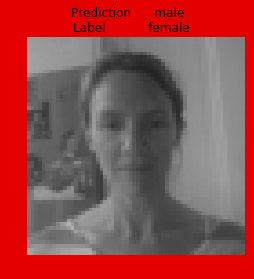

In [54]:
index = int(len(X_all) - len(X_all) * 1.0/2 - 160) #np.random.randint(0, len(X_all))
img = X_all[index]
prediction = np.argmax(model.predict(np.array([img])))
label = np.argmax(y_all[index])
if prediction == label:
    plt.figure(facecolor='xkcd:green')
else:
    plt.figure(facecolor='xkcd:red')
imshow(img)
plt.title("{:15} {:8}\n{:15} {:8}".format("Prediction", readable_labels[prediction], "Label", readable_labels[label]))
plt.axis('off')
plt.show()

In [32]:
# helpful to free up some unused resources
gc.collect()

8925

# Load a saved model

In [14]:
from keras.models import load_model
import numpy as np
    
model = load_model('saved_models/trained_model.h5')
img = X_all[0]
np.argmax(model.predict(np.array([img])))

0

In [15]:
# Show model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
__________

# Time prediction on sample images

In [16]:
from timeit import Timer

def predict(images):
        return model.predict(images)
# Get a random set of images
def get_images(n):
    index_list = np.random.randint(0, len(X_all), n)
    images = []
    labels = []
    for i in index_list:
        images.append(X_all[i])
        labels.append(y_all[i])
    images = np.array(images)
    labels = np.array(labels)
    return images, labels
    

# first argument is the code to be run, the second "setup" argument is only run once,
# and it not included in the execution time.
t = Timer('predict(images)', setup='from __main__ import predict, get_images; images, _ = get_images(100)')

n = 200
time = t.timeit(n)
print("{:6.5f} Seconds to classifiy {} images".format(time, n*100))
# timeit.timeit('char in text', setup='text = "sample string"; char = "g"')

18.94235 Seconds to classifiy 20000 images


# Look at incorrect predictions

In [17]:
# images, labels = get_images(1000)
images = X_all
labels = y_all
conf = predict(images)
pred = np.argmax(conf, axis=1)
correct = np.argmax(labels, axis=1) == pred

labels = np.argmax(labels, axis=1)

print("{:4.2f}% Correct".format(100*len(correct[correct==True])/len(correct)))
wrong = np.where(correct==False)
n_wrong = len(wrong[0])
print("{} wrong out of {}".format(n_wrong, len(images)))

99.32% Correct
15 wrong out of 2219


## Show all incorrect predictions

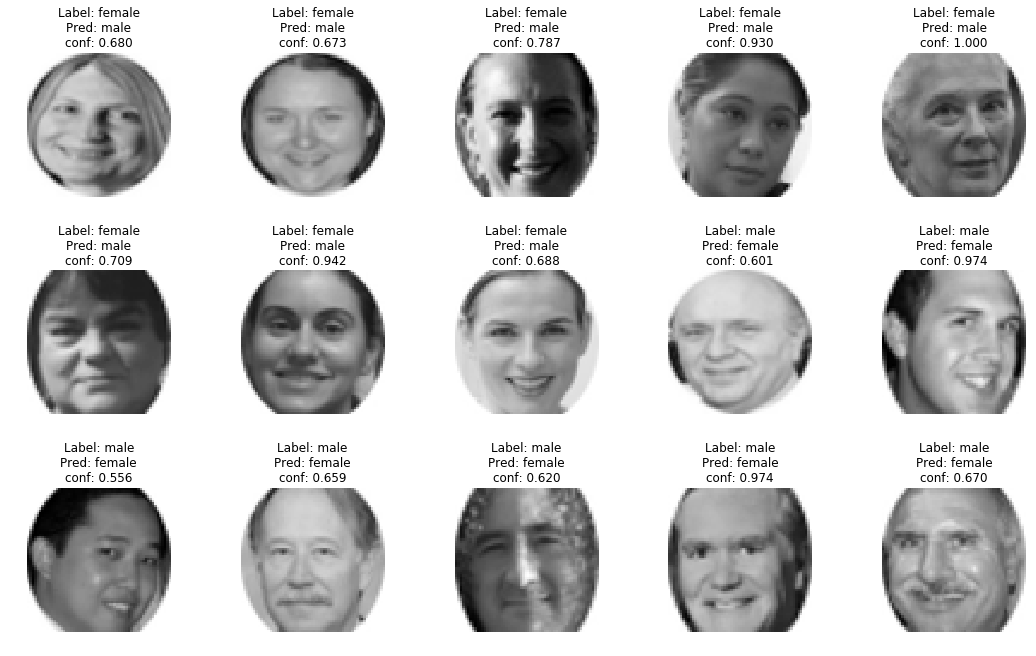

In [18]:
if n_wrong > 0:
    cols = 5
    rows = n_wrong//cols+1
    plt.subplots(figsize=(3*cols,3*rows))
    i = 1
    for i, (img, l, p, c) in enumerate(zip(images[wrong], labels[wrong], pred[wrong], conf[wrong])):
        plt.subplot(rows, cols, i+1)
        imshow(img) 
        plt.title("Label: {}\nPred: {}\nconf: {:.3f}".format(readable_labels[l], readable_labels[p], c[p]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("All images correctly classified.")

In [19]:
for x in range(20):    
    index = np.random.randint(0, len(X_all))
    img = X_all[index]
    prediction = np.argmax(model.predict(np.array([img])))
    depressoMeter = (-1 * conf[index][0] + -1/2 * conf[index][3] + conf[index][2]) / conf[index][1]
    blue = 0.
    red = 0.
    green = 0.
    if (depressoMeter > -1 and depressoMeter < 1) == False:  
        if depressoMeter < 0:
            depressoMeter = -1 * math.log(abs(depressoMeter))
            red = .15
            green = .15
            if depressoMeter < 20:
                blue = abs(depressoMeter) / 20
            else:
                blue = 1.
        else:
            depressoMeter = math.log(abs(depressoMeter))
            blue = .15
            green = .15
            if depressoMeter < 20:
                red = depressoMeter / 20
            else:
                red = 1.
    else:
        if depressoMeter < 0:
            depressoMeter = 1 / math.log(abs(depressoMeter))
            blue = abs(depressoMeter) / 2 + .3
            red = .3
            green = .3
        else:
            depressoMeter = -1 / math.log(abs(depressoMeter))
            red = abs(depressoMeter) / 2 + .3
            blue = .3
            green = .3
    if red > 1:
        red = 1.
    if blue > 1:
        blue = 1.
    if green > 1:
        green = 1.
    

    label = np.argmax(y_all[index])
    plt.figure(facecolor = (red, green, blue))
    imshow(img)
    plt.title("{:15} {:8}\n{:15} {:8}\n{:15} {:8}".format("Prediction", readable_labels[prediction], "Label", readable_labels[label], "DepressoMeter", depressoMeter))
    plt.axis('off')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 2